# CHILDES Eng-NA: Age vs MLU

In [1]:
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
# List of CSV files to process
mlu_files_50 = ['Abe_mlu50.csv', 'Adam_mlu50.csv', 'Benjamin_mlu50.csv', 'Emily_mlu50.csv', 'Emma_mlu50.csv', 'Eve_mlu50.csv', 'Jillian_mlu50.csv', 'Laura_mlu50.csv', 'Matt_mlu50.csv', 'Naomi_mlu50.csv', 'Nathaniel_mlu50.csv', 'Nina_mlu50.csv', 'Roman_mlu50.csv', 'Ross_mlu50.csv', 'Shem_mlu50.csv', 'Sarah_mlu50.csv', 'Trevor_mlu50.csv']  # Uses _mlu50.csv files
mlu_files_100 = ['Abe_mlu100.csv', 'Adam_mlu100.csv', 'Benjamin_mlu100.csv', 'Emily_mlu100.csv', 'Emma_mlu100.csv', 'Eve_mlu100.csv', 'Jillian_mlu100.csv', 'Laura_mlu100.csv', 'Matt_mlu100.csv', 'Naomi_mlu100.csv', 'Nathaniel_mlu100.csv', 'Nina_mlu100.csv', 'Roman_mlu100.csv', 'Ross_mlu100.csv', 'Shem_mlu100.csv', 'Sarah_mlu100.csv', 'Trevor_mlu100.csv']  # Uses _mlu100.csv files
mlu_files_all = ['Abe_mlu.csv', 'Adam_mlu.csv', 'Benjamin_mlu.csv', 'Emily_mlu.csv', 'Emma_mlu.csv', 'Eve_mlu.csv', 'Jillian_mlu.csv', 'Laura_mlu.csv', 'Matt_mlu.csv', 'Naomi_mlu.csv', 'Nathaniel_mlu.csv', 'Nina_mlu.csv', 'Roman_mlu.csv', 'Ross_mlu.csv', 'Shem_mlu.csv', 'Sarah_mlu.csv', 'Trevor_mlu.csv']  # Uses _mlu.csv files

# Initialize a 2D array to store Spearman's rho values for each CSV file
spearman_rhos_50 = []
spearman_rhos_100 = []
spearman_rhos_all = []

# Load the original _mlu.csv files to get ages (the other _mlu.csv files do not contain the corresponding ages for each transcript)
age_files = ['Abe_mlu.csv', 'Adam_mlu.csv', 'Benjamin_mlu.csv', 'Emily_mlu.csv', 'Emma_mlu.csv', 'Eve_mlu.csv', 'Jillian_mlu.csv', 'Laura_mlu.csv', 'Matt_mlu.csv', 'Naomi_mlu.csv', 'Nathaniel_mlu.csv', 'Nina_mlu.csv', 'Roman_mlu.csv', 'Ross_mlu.csv', 'Shem_mlu.csv', 'Sarah_mlu.csv', 'Trevor_mlu.csv']

In [3]:
def age_in_months(age_str):
    parts = age_str.split(';')
    if len(parts) == 2:  # Example Format: "2;11.28", "2;05.", or "3;"
        years = int(parts[0])
        months_and_days = parts[1].split('.')
        
        # Handle cases where days are not provided
        if months_and_days[0] == '':
            months = 0  # Assume 00 months if no months are provided
        else:
            months = float(months_and_days[0])
        
        # Check if the month format ends with a dot, indicating missing days
        if len(months_and_days) > 1 and months_and_days[1] == '':
            days = 0  # Assume 00 days if no days are provided
        else:
            days = float(months_and_days[1]) if len(months_and_days) > 1 else 0
        
        months += days / 30  # Keep decimal for days
        return years * 12 + months
    return 0  # Consider raising an error instead of returning 0 for invalid formats

In [4]:
def age_mlu_plots(mlu_files, spearman_rhos, age_files):
    age_data = {}

    for age_file in age_files:
        if os.path.exists(age_file):
            with open(age_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)
                # Store ages in a dictionary with the base filename as the key
                for entry in data:
                    base_filename = entry['File'].split('.')[0]  # Get the base filename
                    age_data[base_filename] = age_in_months(entry['Age'])  # Store the age

    for mlu_file in mlu_files:
        # Check if the file exists before attempting to open it
        if os.path.exists(mlu_file):
            with open(mlu_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)

            # Initialize list to hold chosen transcripts
            chosen_transcripts = []
            transcript_list = []
            time_steps = []  # New list to hold time steps

            # Select the first transcript
            if data:  # Check if there is any data
                first_data = data[0]
                # Extract the base filename to get the corresponding age
                base_filename = first_data['File'].split('.')[0]
                first_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                chosen_transcripts.append((first_age, float(first_data['morphemes/utterances'])))
                transcript_list.append(first_data['File'])  # Collect the first transcript name

                last_chosen_age = first_age

                # Select subsequent transcripts that are at least 1 month apart
                for entry in data[1:]:  # Start from the second transcript
                    base_filename = entry['File'].split('.')[0]
                    current_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                    if current_age - last_chosen_age >= 1:
                        chosen_transcripts.append((current_age, float(entry['morphemes/utterances'])))  # Collect age and morphemes/utterances
                        transcript_list.append(entry['File'])  # Collect the transcript name
                        time_steps.append(current_age - last_chosen_age)  # Calculate time step without rounding
                        last_chosen_age = current_age

            # Plot Age vs Morphemes/Utterances
            ages = [t[0] for t in chosen_transcripts]
            morphemes_utterances = [t[1] for t in chosen_transcripts]

            plt.figure(figsize=(10, 5))
            plt.scatter(ages, morphemes_utterances, marker='o')  # scatter plot
            plt.title(f'Age vs MLU for {mlu_file}')
            plt.xlabel('Age (months)')
            plt.ylabel('MLU (Morphemes/Utterances)')
            # plt.xticks([round(age, 2) for age in ages])  # Set x-ticks to show each month with decimals
            plt.grid()
            plt.show()       

            # Calculate Spearman's rho
            if len(ages) > 1:  # Ensure there are enough data points
                spearman_corr, _ = spearmanr(ages, morphemes_utterances)
                spearman_rhos.append([mlu_file, spearman_corr])  # Store the file name and Spearman's rho value
                print(f"Spearman's rho for {mlu_file}: {spearman_corr:.4f}\n")

            # Print the list of chosen transcripts, converted ages, and time steps
            print(f"Chosen Transcripts for {mlu_file}: \n", transcript_list, "\n")
            print(f"MLU Scores for {mlu_file}: \n", morphemes_utterances, "\n")  # Print the MLU scores
            print(f"Ages for {mlu_file}: \n", ages, "\n")  # Print the converted ages
            print(f"Time Steps for {mlu_file}: \n", time_steps, "\n")  # Print the time steps

## Age vs MLU (50 Utterances)

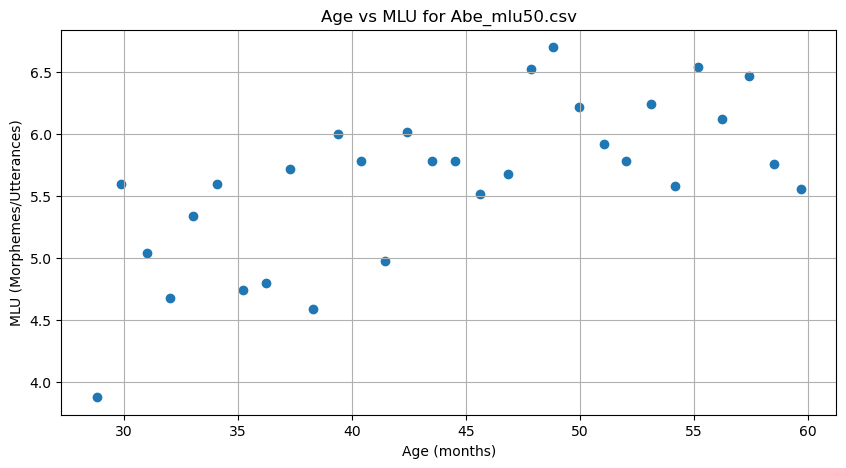

Spearman's rho for Abe_mlu50.csv: 0.6226

Chosen Transcripts for Abe_mlu50.csv: 
 ['020424.ipcore.cex', '020526.ipcore.cex', '020700.ipcore.cex', '020801.ipcore.cex', '020901.ipcore.cex', '021003.ipcore.cex', '021106.ipcore.cex', '030007.ipcore.cex', '030108.ipcore.cex', '030209.ipcore.cex', '030311.ipcore.cex', '030412.ipcore.cex', '030513.ipcore.cex', '030613.ipcore.cex', '030715.ipcore.cex', '030816.ipcore.cex', '030919.ipcore.cex', '031025.ipcore.cex', '031125.ipcore.cex', '040025.ipcore.cex', '040129.ipcore.cex', '040301.ipcore.cex', '040401.ipcore.cex', '040503.ipcore.cex', '040605.ipcore.cex', '040705.ipcore.cex', '040807.ipcore.cex', '040912.ipcore.cex', '041015.ipcore.cex', '041121.ipcore.cex'] 

MLU Scores for Abe_mlu50.csv: 
 [3.88, 5.6, 5.04, 4.68, 5.34, 5.6, 4.74, 4.8, 5.72, 4.592, 6.0, 5.78, 4.98, 6.02, 5.78, 5.78, 5.52, 5.68, 6.521, 6.7, 6.22, 5.918, 5.78, 6.245, 5.58, 6.54, 6.12, 6.469, 5.76, 5.56] 

Ages for Abe_mlu50.csv: 
 [28.8, 29.866666666666667, 31.0, 32.03333333

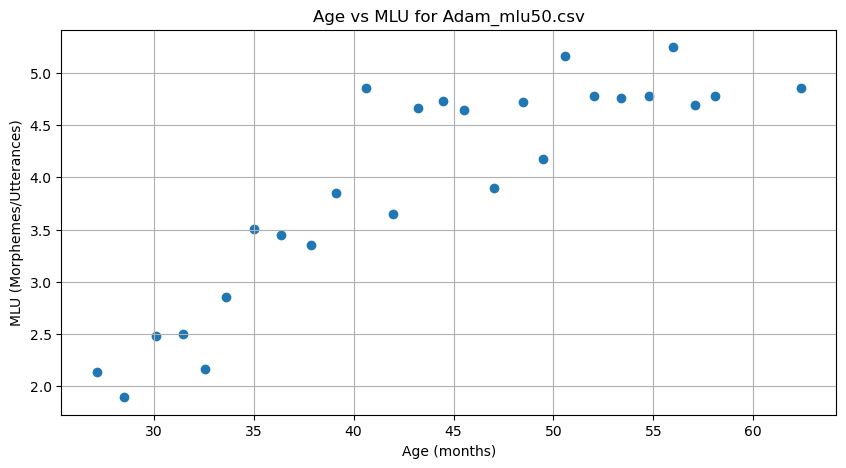

Spearman's rho for Adam_mlu50.csv: 0.8735

Chosen Transcripts for Adam_mlu50.csv: 
 ['020304.ipcore.cex', '020415.ipcore.cex', '020603.ipcore.cex', '020714.ipcore.cex', '020816.ipcore.cex', '020918.ipcore.cex', '021030.ipcore.cex', '030011.ipcore.cex', '030126.ipcore.cex', '030304.ipcore.cex', '030418.ipcore.cex', '030529.ipcore.cex', '030707.ipcore.cex', '030814.ipcore.cex', '030916.ipcore.cex', '031101.ipcore.cex', '040014.ipcore.cex', '040115.ipcore.cex', '040217.ipcore.cex', '040401.ipcore.cex', '040511.ipcore.cex', '040624.ipcore.cex', '040729.ipcore.cex', '040902.ipcore.cex', '041002.ipcore.cex', '050212.ipcore.cex'] 

MLU Scores for Adam_mlu50.csv: 
 [2.14, 1.896, 2.479, 2.5, 2.163, 2.851, 3.51, 3.449, 3.348, 3.848, 4.857, 3.653, 4.66, 4.735, 4.64, 3.894, 4.72, 4.18, 5.16, 4.776, 4.76, 4.776, 5.245, 4.694, 4.78, 4.857] 

Ages for Adam_mlu50.csv: 
 [27.133333333333333, 28.5, 30.1, 31.46666666666667, 32.53333333333333, 33.6, 35.0, 36.36666666666667, 37.86666666666667, 39.133333333

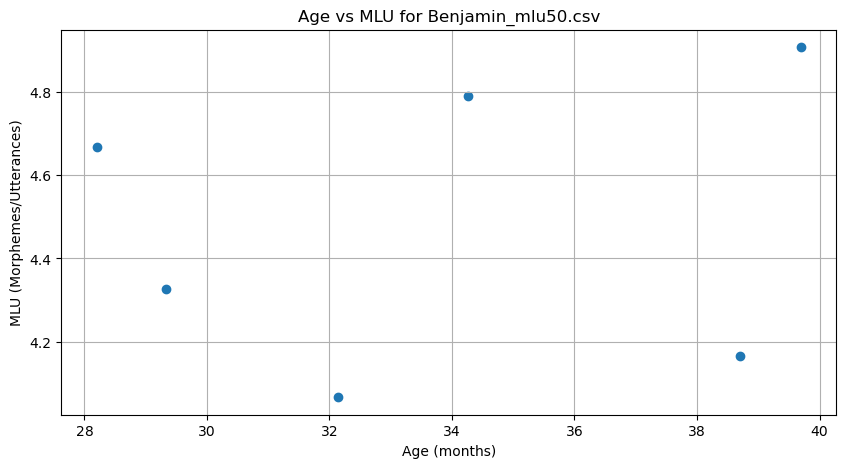

Spearman's rho for Benjamin_mlu50.csv: 0.3143

Chosen Transcripts for Benjamin_mlu50.csv: 
 ['020406.ipcore.cex', '020510.ipcore.cex', '020804.ipcore.cex', '021008.ipcore.cex', '030221.ipcore.cex', '030321.ipcore.cex'] 

MLU Scores for Benjamin_mlu50.csv: 
 [4.667, 4.326, 4.067, 4.791, 4.167, 4.907] 

Ages for Benjamin_mlu50.csv: 
 [28.2, 29.333333333333332, 32.13333333333333, 34.266666666666666, 38.7, 39.7] 

Time Steps for Benjamin_mlu50.csv: 
 [1.1333333333333329, 2.8000000000000007, 2.133333333333333, 4.433333333333337, 1.0] 



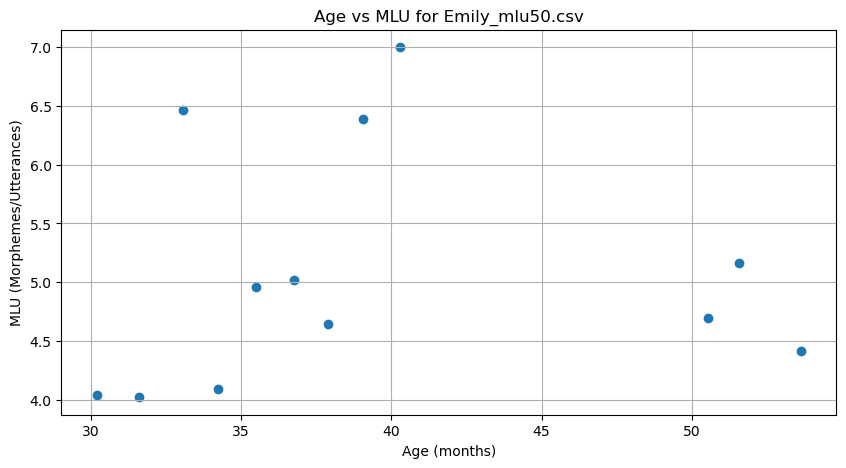

Spearman's rho for Emily_mlu50.csv: 0.3846

Chosen Transcripts for Emily_mlu50.csv: 
 ['020606.ipcore.cex', '020718.ipcore.cex', '020902.ipcore.cex', '021007.ipcore.cex', '021115.ipcore.cex', '030023.ipcore.cex', '030127.ipcore.cex', '030302.ipcore.cex', '030409.ipcore.cex', '040216.ipcore.cex', '040317.ipcore.cex', '040519.ipcore.cex'] 

MLU Scores for Emily_mlu50.csv: 
 [4.04, 4.02, 6.469, 4.089, 4.96, 5.021, 4.643, 6.386, 7.0, 4.696, 5.16, 4.417] 

Ages for Emily_mlu50.csv: 
 [30.2, 31.6, 33.06666666666666, 34.233333333333334, 35.5, 36.766666666666666, 37.9, 39.06666666666667, 40.3, 50.53333333333333, 51.56666666666666, 53.63333333333333] 

Time Steps for Emily_mlu50.csv: 
 [1.4000000000000021, 1.4666666666666615, 1.1666666666666714, 1.2666666666666657, 1.2666666666666657, 1.1333333333333329, 1.1666666666666714, 1.2333333333333272, 10.233333333333334, 1.0333333333333314, 2.06666666666667] 



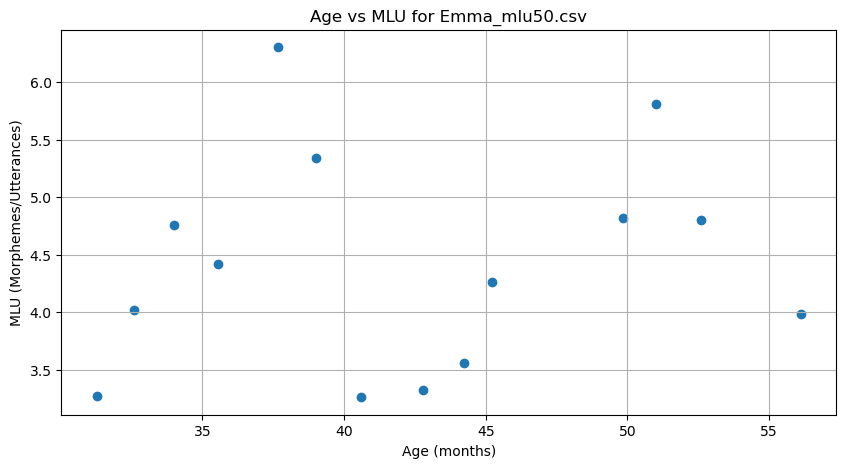

Spearman's rho for Emma_mlu50.csv: 0.1824

Chosen Transcripts for Emma_mlu50.csv: 
 ['020708.ipcore.cex', '020818.ipcore.cex', '021000.ipcore.cex', '021116.ipcore.cex', '030120.ipcore.cex', '030300.ipcore.cex', '030418.ipcore.cex', '030624.ipcore.cex', '030807.ipcore.cex', '030907.ipcore.cex', '040125.ipcore.cex', '040300.ipcore.cex', '040418.ipcore.cex', '040804.ipcore.cex'] 

MLU Scores for Emma_mlu50.csv: 
 [3.271, 4.021, 4.755, 4.417, 6.306, 5.34, 3.26, 3.32, 3.56, 4.265, 4.816, 5.816, 4.8, 3.98] 

Ages for Emma_mlu50.csv: 
 [31.266666666666666, 32.6, 34.0, 35.53333333333333, 37.666666666666664, 39.0, 40.6, 42.8, 44.233333333333334, 45.233333333333334, 49.833333333333336, 51.0, 52.6, 56.13333333333333] 

Time Steps for Emma_mlu50.csv: 
 [1.3333333333333357, 1.3999999999999986, 1.5333333333333314, 2.133333333333333, 1.3333333333333357, 1.6000000000000014, 2.1999999999999957, 1.4333333333333371, 1.0, 4.600000000000001, 1.1666666666666643, 1.6000000000000014, 3.5333333333333314] 



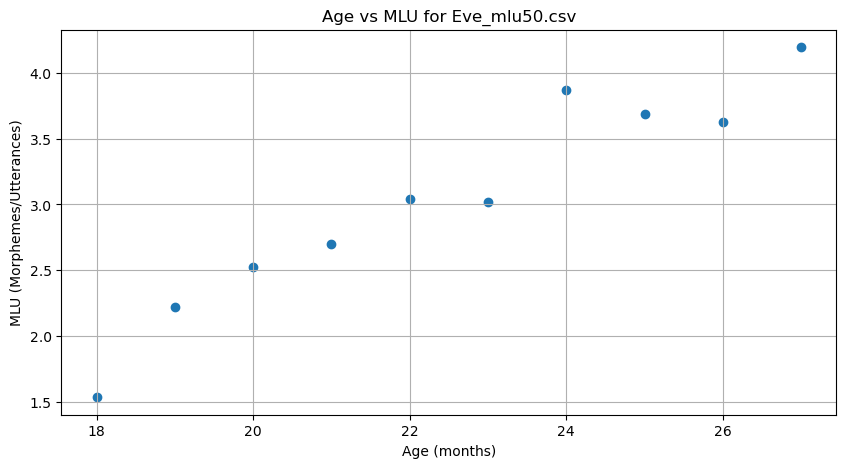

Spearman's rho for Eve_mlu50.csv: 0.9394

Chosen Transcripts for Eve_mlu50.csv: 
 ['010600a.ipcore.cex', '010700a.ipcore.cex', '010800.ipcore.cex', '010900a.ipcore.cex', '011000a.ipcore.cex', '011100a.ipcore.cex', '020000a.ipcore.cex', '020100a.ipcore.cex', '020200a.ipcore.cex', '020300a.ipcore.cex'] 

MLU Scores for Eve_mlu50.csv: 
 [1.533, 2.222, 2.521, 2.696, 3.042, 3.021, 3.87, 3.688, 3.63, 4.196] 

Ages for Eve_mlu50.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_mlu50.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



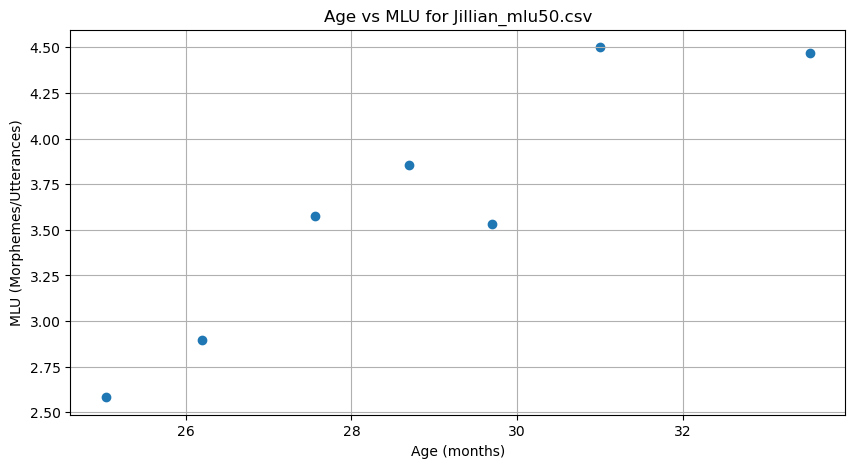

Spearman's rho for Jillian_mlu50.csv: 0.8571

Chosen Transcripts for Jillian_mlu50.csv: 
 ['020101.ipcore.cex', '020206.ipcore.cex', '020317.ipcore.cex', '020421.ipcore.cex', '020521.ipcore.cex', '020700.ipcore.cex', '020916.ipcore.cex'] 

MLU Scores for Jillian_mlu50.csv: 
 [2.583, 2.898, 3.574, 3.857, 3.532, 4.5, 4.469] 

Ages for Jillian_mlu50.csv: 
 [25.033333333333335, 26.2, 27.566666666666666, 28.7, 29.7, 31.0, 33.53333333333333] 

Time Steps for Jillian_mlu50.csv: 
 [1.1666666666666643, 1.3666666666666671, 1.1333333333333329, 1.0, 1.3000000000000007, 2.5333333333333314] 



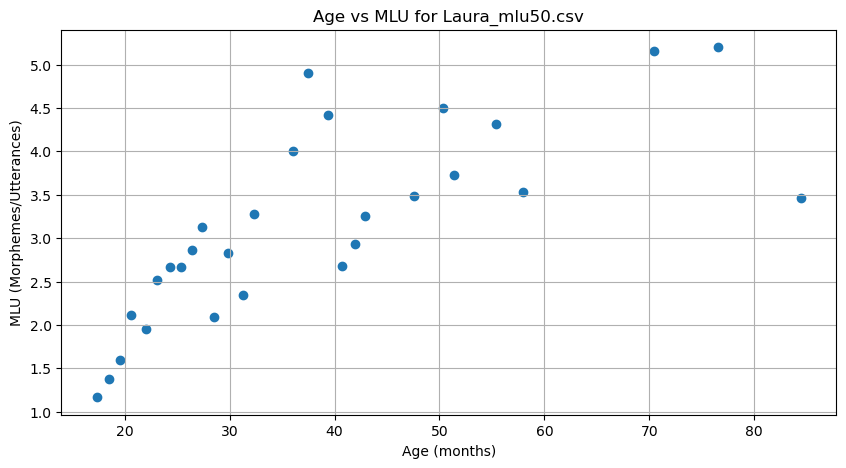

Spearman's rho for Laura_mlu50.csv: 0.8433

Chosen Transcripts for Laura_mlu50.csv: 
 ['010510.ipcore.cex', '010614a.ipcore.cex', '010717.ipcore.cex', '010819.ipcore.cex', '011000.ipcore.cex', '011103.ipcore.cex', '020010.ipcore.cex', '020110.ipcore.cex', '020212a.ipcore.cex', '020312.ipcore.cex', '020416.ipcore.cex', '020526.ipcore.cex', '020708.ipcore.cex', '020811.ipcore.cex', '030000.ipcore.cex', '030113.ipcore.cex', '030311.ipcore.cex', '030422.ipcore.cex', '030528a.ipcore.cex', '030628.ipcore.cex', '031117.ipcore.cex', '040211a.ipcore.cex', '040311a.ipcore.cex', '040711a.ipcore.cex', '041000.ipcore.cex', '051013.ipcore.cex', '060417.ipcore.cex', '070014.ipcore.cex'] 

MLU Scores for Laura_mlu50.csv: 
 [1.167, 1.375, 1.6, 2.109, 1.957, 2.512, 2.667, 2.667, 2.865, 3.129, 2.088, 2.833, 2.349, 3.273, 4.0, 4.903, 4.419, 2.681, 2.929, 3.25, 3.488, 4.5, 3.727, 4.31, 3.535, 5.154, 5.2, 3.457] 

Ages for Laura_mlu50.csv: 
 [17.333333333333332, 18.46666666666667, 19.566666666666666, 20.633

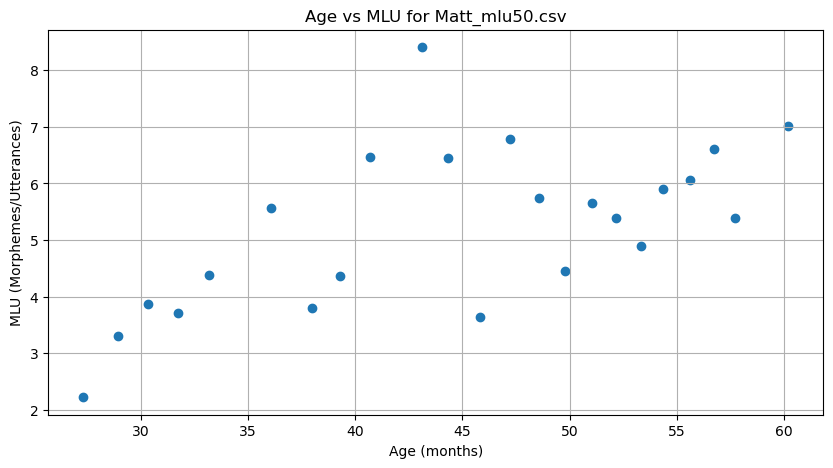

Spearman's rho for Matt_mlu50.csv: 0.6018

Chosen Transcripts for Matt_mlu50.csv: 
 ['020310.ipcore.cex', '020428.ipcore.cex', '020611.ipcore.cex', '020722.ipcore.cex', '020905.ipcore.cex', '030002.ipcore.cex', '030129.ipcore.cex', '030309.ipcore.cex', '030421.ipcore.cex', '030704.ipcore.cex', '030810.ipcore.cex', '030924.ipcore.cex', '031106.ipcore.cex', '040017.ipcore.cex', '040123.ipcore.cex', '040301.ipcore.cex', '040405.ipcore.cex', '040509.ipcore.cex', '040610.ipcore.cex', '040718.ipcore.cex', '040821.ipcore.cex', '040921.ipcore.cex', '050005.ipcore.cex'] 

MLU Scores for Matt_mlu50.csv: 
 [2.22, 3.298, 3.86, 3.708, 4.388, 5.561, 3.8, 4.36, 6.468, 8.408, 6.449, 3.633, 6.787, 5.74, 4.449, 5.653, 5.388, 4.891, 5.894, 6.065, 6.617, 5.383, 7.021] 

Ages for Matt_mlu50.csv: 
 [27.333333333333332, 28.933333333333334, 30.366666666666667, 31.733333333333334, 33.166666666666664, 36.06666666666667, 37.96666666666667, 39.3, 40.7, 43.13333333333333, 44.333333333333336, 45.8, 47.2, 48.5666666

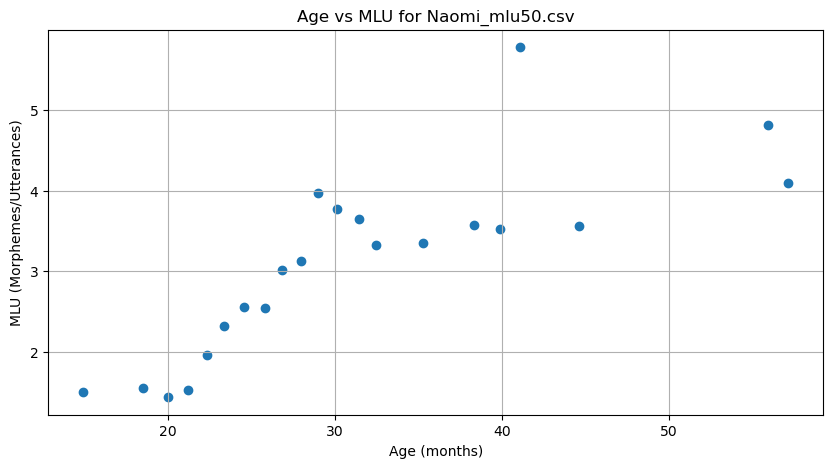

Spearman's rho for Naomi_mlu50.csv: 0.8909

Chosen Transcripts for Naomi_mlu50.csv: 
 ['010229.ipcore.cex', '010616.ipcore.cex', '010800.ipcore.cex', '010907.ipcore.cex', '011010a.ipcore.cex', '011111.ipcore.cex', '020018.ipcore.cex', '020125.ipcore.cex', '020225.ipcore.cex', '020329.ipcore.cex', '020430.ipcore.cex', '020604.ipcore.cex', '020713.ipcore.cex', '020814.ipcore.cex', '021108.ipcore.cex', '030210.ipcore.cex', '030326.ipcore.cex', '030503.ipcore.cex', '030819.ipcore.cex', '040728.ipcore.cex', '040903.ipcore.cex'] 

MLU Scores for Naomi_mlu50.csv: 
 [1.5, 1.553, 1.44, 1.524, 1.96, 2.326, 2.563, 2.54, 3.02, 3.125, 3.976, 3.769, 3.647, 3.327, 3.356, 3.571, 3.521, 5.778, 3.56, 4.814, 4.1] 

Ages for Naomi_mlu50.csv: 
 [14.966666666666667, 18.53333333333333, 20.0, 21.233333333333334, 22.333333333333336, 23.366666666666667, 24.6, 25.833333333333332, 26.833333333333332, 27.96666666666667, 29.0, 30.133333333333333, 31.433333333333334, 32.46666666666667, 35.266666666666666, 38.3333333

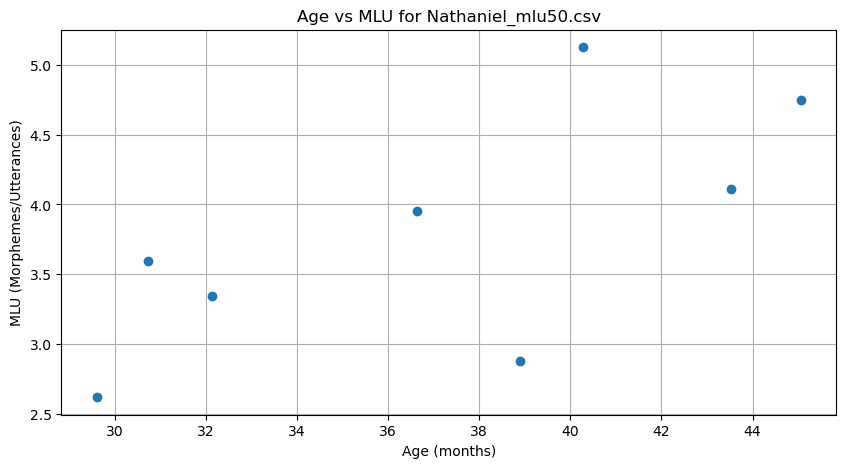

Spearman's rho for Nathaniel_mlu50.csv: 0.7619

Chosen Transcripts for Nathaniel_mlu50.csv: 
 ['020518a.ipcore.cex', '020622a.ipcore.cex', '020804a.ipcore.cex', '030019a.ipcore.cex', '030227a.ipcore.cex', '030408a.ipcore.cex', '030716.ipcore.cex', '030902.ipcore.cex'] 

MLU Scores for Nathaniel_mlu50.csv: 
 [2.62, 3.592, 3.347, 3.955, 2.878, 5.125, 4.111, 4.745] 

Ages for Nathaniel_mlu50.csv: 
 [29.6, 30.733333333333334, 32.13333333333333, 36.63333333333333, 38.9, 40.266666666666666, 43.53333333333333, 45.06666666666666] 

Time Steps for Nathaniel_mlu50.csv: 
 [1.1333333333333329, 1.3999999999999986, 4.5, 2.2666666666666657, 1.3666666666666671, 3.2666666666666657, 1.5333333333333314] 



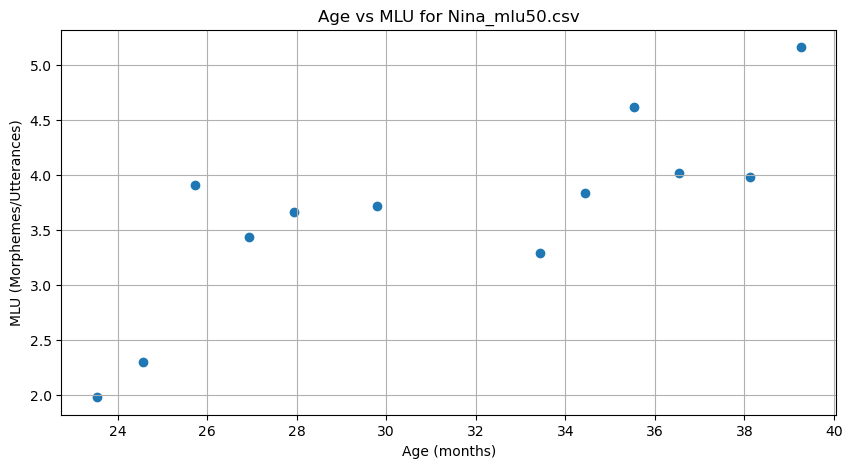

Spearman's rho for Nina_mlu50.csv: 0.8252

Chosen Transcripts for Nina_mlu50.csv: 
 ['011116.ipcore.cex', '020017.ipcore.cex', '020122.ipcore.cex', '020228.ipcore.cex', '020328.ipcore.cex', '020524.ipcore.cex', '020913.ipcore.cex', '021013.ipcore.cex', '021116.ipcore.cex', '030016.ipcore.cex', '030204.ipcore.cex', '030308.ipcore.cex'] 

MLU Scores for Nina_mlu50.csv: 
 [1.98, 2.298, 3.911, 3.438, 3.66, 3.72, 3.292, 3.837, 4.62, 4.02, 3.98, 5.163] 

Ages for Nina_mlu50.csv: 
 [23.53333333333333, 24.566666666666666, 25.733333333333334, 26.933333333333334, 27.933333333333334, 29.8, 33.43333333333334, 34.43333333333334, 35.53333333333333, 36.53333333333333, 38.13333333333333, 39.266666666666666] 

Time Steps for Nina_mlu50.csv: 
 [1.033333333333335, 1.1666666666666679, 1.1999999999999993, 1.0, 1.8666666666666671, 3.6333333333333364, 1.0, 1.0999999999999943, 1.0, 1.6000000000000014, 1.1333333333333329] 



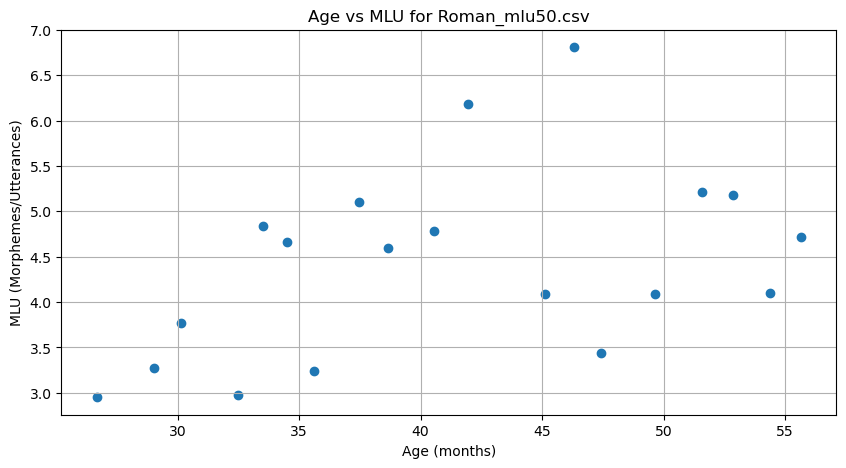

Spearman's rho for Roman_mlu50.csv: 0.5000

Chosen Transcripts for Roman_mlu50.csv: 
 ['020220.ipcore.cex', '020501.ipcore.cex', '020604.ipcore.cex', '020814.ipcore.cex', '020915.ipcore.cex', '021015.ipcore.cex', '021118.ipcore.cex', '030114.ipcore.cex', '030220.ipcore.cex', '030417.ipcore.cex', '030529.ipcore.cex', '030904.ipcore.cex', '031009.ipcore.cex', '031113.ipcore.cex', '040119.ipcore.cex', '040317.ipcore.cex', '040426.ipcore.cex', '040611.ipcore.cex', '040720.ipcore.cex'] 

MLU Scores for Roman_mlu50.csv: 
 [2.951, 3.27, 3.773, 2.976, 4.837, 4.659, 3.24, 5.106, 4.6, 4.778, 6.188, 4.085, 6.809, 3.438, 4.087, 5.214, 5.184, 4.1, 4.72] 

Ages for Roman_mlu50.csv: 
 [26.666666666666668, 29.03333333333333, 30.133333333333333, 32.46666666666667, 33.5, 34.5, 35.6, 37.46666666666667, 38.666666666666664, 40.56666666666666, 41.96666666666667, 45.13333333333333, 46.3, 47.43333333333334, 49.63333333333333, 51.56666666666666, 52.86666666666667, 54.36666666666667, 55.666666666666664] 

Time 

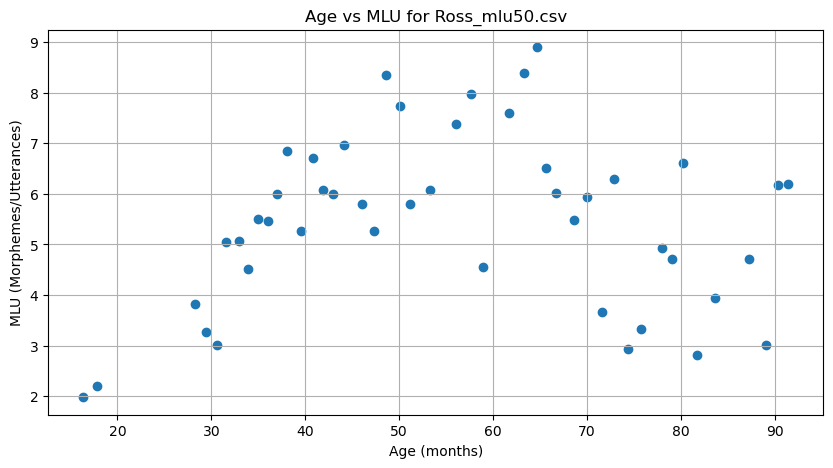

Spearman's rho for Ross_mlu50.csv: 0.1082

Chosen Transcripts for Ross_mlu50.csv: 
 ['010411a.ipcore.cex', '010523.ipcore.cex', '020409.ipcore.cex', '020514a.ipcore.cex', '020617a.ipcore.cex', '020718a.ipcore.cex', '020827a.ipcore.cex', '020928.ipcore.cex', '021100a.ipcore.cex', '030001a.ipcore.cex', '030101.ipcore.cex', '030202.ipcore.cex', '030315a.ipcore.cex', '030426a.ipcore.cex', '030526a.ipcore.cex', '030628.ipcore.cex', '030803a.ipcore.cex', '031001.ipcore.cex', '031109.ipcore.cex', '040019.ipcore.cex', '040201.ipcore.cex', '040305a.ipcore.cex', '040508a.ipcore.cex', '040800a.ipcore.cex', '040920a.ipcore.cex', '041027a.ipcore.cex', '050120a.ipcore.cex', '050309a.ipcore.cex', '050420a.ipcore.cex', '050520a.ipcore.cex', '050622a.ipcore.cex', '050820a.ipcore.cex', '051001a.ipcore.cex', '051117a.ipcore.cex', '060027b.ipcore.cex', '060211a1.ipcore.cex', '060323a.ipcore.cex', '060530a.ipcore.cex', '060701a.ipcore.cex', '060807a.ipcore.cex', '060922a.ipcore.cex', '061119a.ipcore.cex', 

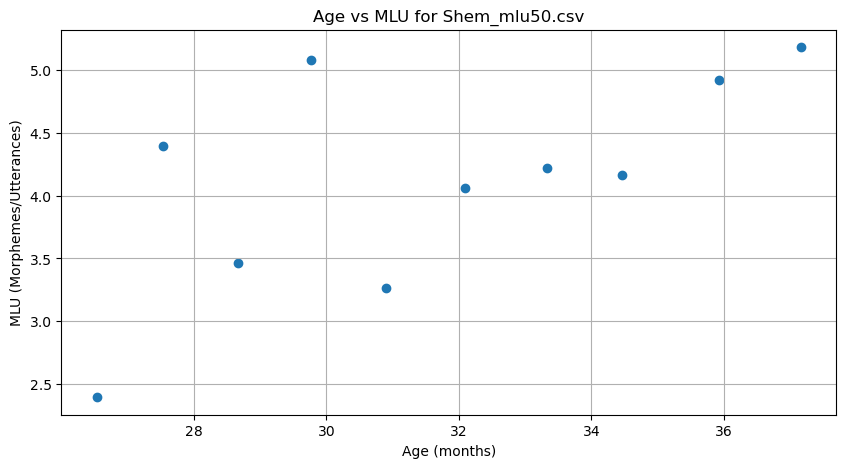

Spearman's rho for Shem_mlu50.csv: 0.5515

Chosen Transcripts for Shem_mlu50.csv: 
 ['020216.ipcore.cex', '020316.ipcore.cex', '020420.ipcore.cex', '020523.ipcore.cex', '020627.ipcore.cex', '020803.ipcore.cex', '020910.ipcore.cex', '021014.ipcore.cex', '021128.ipcore.cex', '030105.ipcore.cex'] 

MLU Scores for Shem_mlu50.csv: 
 [2.396, 4.396, 3.46, 5.08, 3.265, 4.06, 4.22, 4.163, 4.917, 5.18] 

Ages for Shem_mlu50.csv: 
 [26.53333333333333, 27.53333333333333, 28.666666666666668, 29.766666666666666, 30.9, 32.1, 33.333333333333336, 34.46666666666667, 35.93333333333334, 37.166666666666664] 

Time Steps for Shem_mlu50.csv: 
 [1.0, 1.1333333333333364, 1.0999999999999979, 1.1333333333333329, 1.2000000000000028, 1.2333333333333343, 1.1333333333333329, 1.4666666666666686, 1.2333333333333272] 



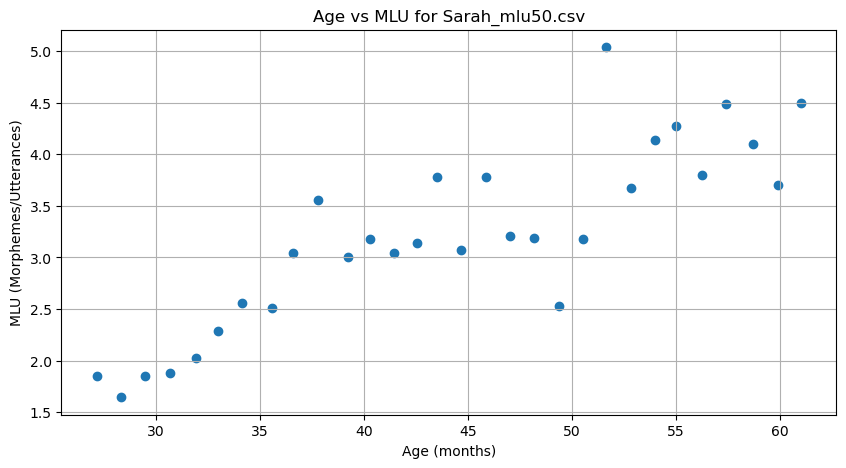

Spearman's rho for Sarah_mlu50.csv: 0.8784

Chosen Transcripts for Sarah_mlu50.csv: 
 ['020305.ipcore.cex', '020410.ipcore.cex', '020515.ipcore.cex', '020620.ipcore.cex', '020728.ipcore.cex', '020900.ipcore.cex', '021005.ipcore.cex', '021117.ipcore.cex', '030018a.ipcore.cex', '030124.ipcore.cex', '030307a.ipcore.cex', '030409.ipcore.cex', '030513.ipcore.cex', '030616.ipcore.cex', '030716.ipcore.cex', '030820.ipcore.cex', '030926a.ipcore.cex', '031030.ipcore.cex', '040005.ipcore.cex', '040111.ipcore.cex', '040216.ipcore.cex', '040319.ipcore.cex', '040425.ipcore.cex', '040529.ipcore.cex', '040700.ipcore.cex', '040807.ipcore.cex', '040912.ipcore.cex', '041021.ipcore.cex', '041126.ipcore.cex', '050030.ipcore.cex'] 

MLU Scores for Sarah_mlu50.csv: 
 [1.848, 1.646, 1.85, 1.881, 2.023, 2.286, 2.556, 2.512, 3.045, 3.561, 3.0, 3.18, 3.044, 3.143, 3.776, 3.068, 3.78, 3.205, 3.186, 2.532, 3.18, 5.036, 3.673, 4.14, 4.271, 3.8, 4.49, 4.1, 3.7, 4.5] 

Ages for Sarah_mlu50.csv: 
 [27.166666666666668

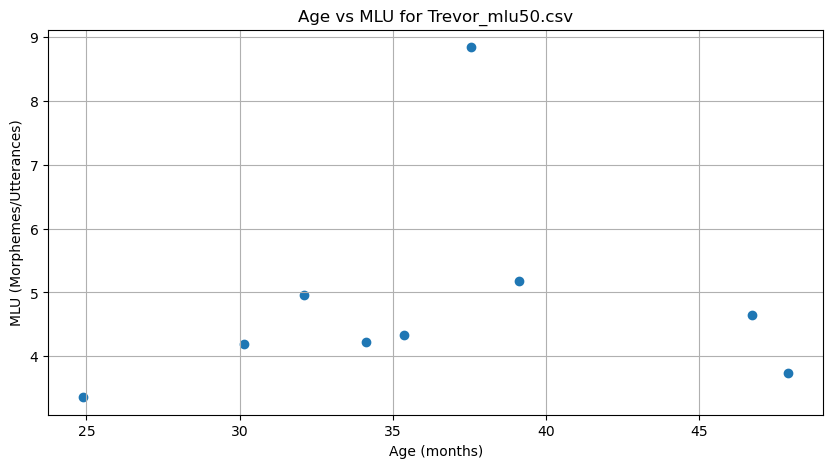

Spearman's rho for Trevor_mlu50.csv: 0.3333

Chosen Transcripts for Trevor_mlu50.csv: 
 ['020027.ipcore.cex', '020604.ipcore.cex', '020803.ipcore.cex', '021004.ipcore.cex', '021111.ipcore.cex', '030117.ipcore.cex', '030304.ipcore.cex', '031022.ipcore.cex', '031127a.ipcore.cex'] 

MLU Scores for Trevor_mlu50.csv: 
 [3.36, 4.2, 4.959, 4.22, 4.34, 8.84, 5.184, 4.64, 3.739] 

Ages for Trevor_mlu50.csv: 
 [24.9, 30.133333333333333, 32.1, 34.13333333333333, 35.36666666666667, 37.56666666666667, 39.13333333333333, 46.733333333333334, 47.9] 

Time Steps for Trevor_mlu50.csv: 
 [5.233333333333334, 1.9666666666666686, 2.0333333333333314, 1.2333333333333343, 2.200000000000003, 1.5666666666666629, 7.600000000000001, 1.1666666666666643] 



In [5]:
age_mlu_plots(mlu_files_50, spearman_rhos_50, age_files)

## Age vs MLU (100 Utterances)

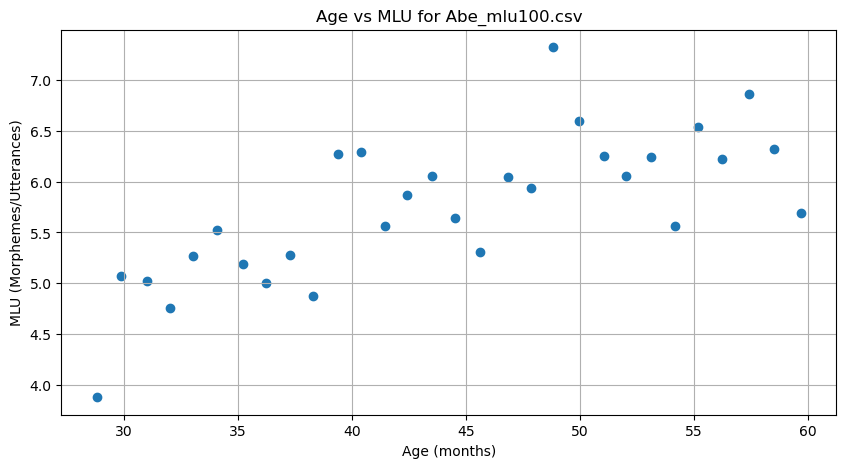

Spearman's rho for Abe_mlu100.csv: 0.7513

Chosen Transcripts for Abe_mlu100.csv: 
 ['020424.ipcore-100.cex', '020526.ipcore-100.cex', '020700.ipcore-100.cex', '020801.ipcore-100.cex', '020901.ipcore-100.cex', '021003.ipcore-100.cex', '021106.ipcore-100.cex', '030007.ipcore-100.cex', '030108.ipcore-100.cex', '030209.ipcore-100.cex', '030311.ipcore-100.cex', '030412.ipcore-100.cex', '030513.ipcore-100.cex', '030613.ipcore-100.cex', '030715.ipcore-100.cex', '030816.ipcore-100.cex', '030919.ipcore-100.cex', '031025.ipcore-100.cex', '031125.ipcore-100.cex', '040025.ipcore-100.cex', '040129.ipcore-100.cex', '040301.ipcore-100.cex', '040401.ipcore-100.cex', '040503.ipcore-100.cex', '040605.ipcore-100.cex', '040705.ipcore-100.cex', '040807.ipcore-100.cex', '040912.ipcore-100.cex', '041015.ipcore-100.cex', '041121.ipcore-100.cex'] 

MLU Scores for Abe_mlu100.csv: 
 [3.88, 5.074, 5.02, 4.76, 5.27, 5.52, 5.19, 5.0, 5.28, 4.879, 6.27, 6.29, 5.56, 5.87, 6.05, 5.64, 5.31, 6.04, 5.938, 7.32, 6.59, 6

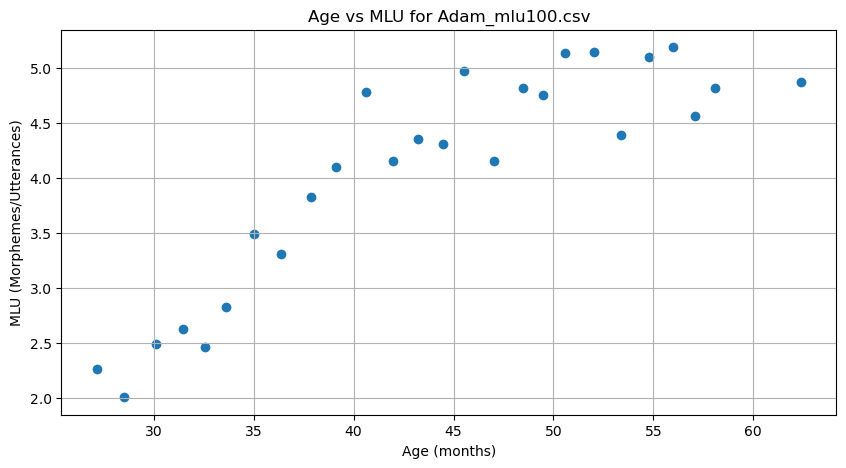

Spearman's rho for Adam_mlu100.csv: 0.8749

Chosen Transcripts for Adam_mlu100.csv: 
 ['020304.ipcore-100.cex', '020415.ipcore-100.cex', '020603.ipcore-100.cex', '020714.ipcore-100.cex', '020816.ipcore-100.cex', '020918.ipcore-100.cex', '021030.ipcore-100.cex', '030011.ipcore-100.cex', '030126.ipcore-100.cex', '030304.ipcore-100.cex', '030418.ipcore-100.cex', '030529.ipcore-100.cex', '030707.ipcore-100.cex', '030814.ipcore-100.cex', '030916.ipcore-100.cex', '031101.ipcore-100.cex', '040014.ipcore-100.cex', '040115.ipcore-100.cex', '040217.ipcore-100.cex', '040401.ipcore-100.cex', '040511.ipcore-100.cex', '040624.ipcore-100.cex', '040729.ipcore-100.cex', '040902.ipcore-100.cex', '041002.ipcore-100.cex', '050212.ipcore-100.cex'] 

MLU Scores for Adam_mlu100.csv: 
 [2.27, 2.01, 2.495, 2.632, 2.465, 2.83, 3.495, 3.313, 3.83, 4.106, 4.786, 4.162, 4.36, 4.316, 4.98, 4.156, 4.823, 4.76, 5.14, 5.152, 4.39, 5.103, 5.192, 4.566, 4.818, 4.876] 

Ages for Adam_mlu100.csv: 
 [27.133333333333333, 28

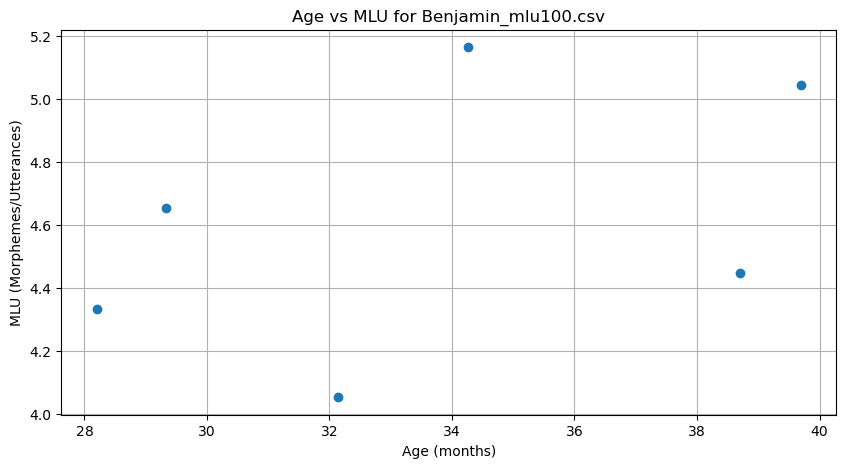

Spearman's rho for Benjamin_mlu100.csv: 0.4857

Chosen Transcripts for Benjamin_mlu100.csv: 
 ['020406.ipcore-100.cex', '020510.ipcore-100.cex', '020804.ipcore-100.cex', '021008.ipcore-100.cex', '030221.ipcore-100.cex', '030321.ipcore-100.cex'] 

MLU Scores for Benjamin_mlu100.csv: 
 [4.333, 4.653, 4.054, 5.163, 4.448, 5.043] 

Ages for Benjamin_mlu100.csv: 
 [28.2, 29.333333333333332, 32.13333333333333, 34.266666666666666, 38.7, 39.7] 

Time Steps for Benjamin_mlu100.csv: 
 [1.1333333333333329, 2.8000000000000007, 2.133333333333333, 4.433333333333337, 1.0] 



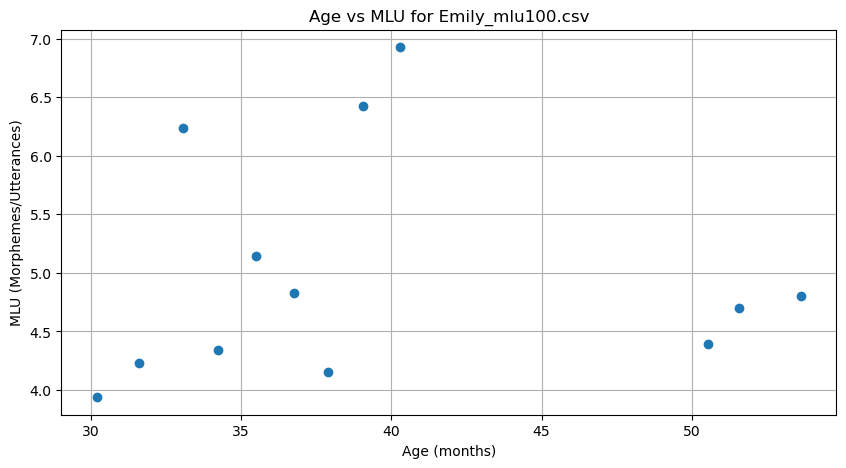

Spearman's rho for Emily_mlu100.csv: 0.3427

Chosen Transcripts for Emily_mlu100.csv: 
 ['020606.ipcore-100.cex', '020718.ipcore-100.cex', '020902.ipcore-100.cex', '021007.ipcore-100.cex', '021115.ipcore-100.cex', '030023.ipcore-100.cex', '030127.ipcore-100.cex', '030302.ipcore-100.cex', '030409.ipcore-100.cex', '040216.ipcore-100.cex', '040317.ipcore-100.cex', '040519.ipcore-100.cex'] 

MLU Scores for Emily_mlu100.csv: 
 [3.938, 4.232, 6.235, 4.344, 5.143, 4.83, 4.156, 6.422, 6.927, 4.389, 4.697, 4.802] 

Ages for Emily_mlu100.csv: 
 [30.2, 31.6, 33.06666666666666, 34.233333333333334, 35.5, 36.766666666666666, 37.9, 39.06666666666667, 40.3, 50.53333333333333, 51.56666666666666, 53.63333333333333] 

Time Steps for Emily_mlu100.csv: 
 [1.4000000000000021, 1.4666666666666615, 1.1666666666666714, 1.2666666666666657, 1.2666666666666657, 1.1333333333333329, 1.1666666666666714, 1.2333333333333272, 10.233333333333334, 1.0333333333333314, 2.06666666666667] 



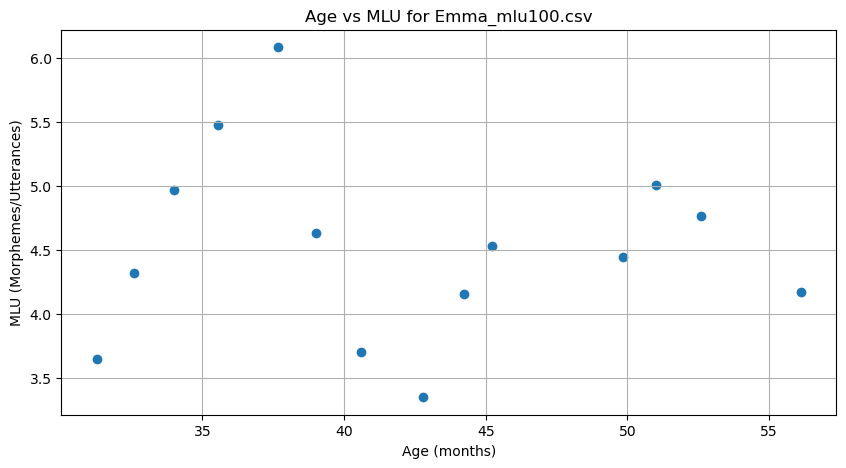

Spearman's rho for Emma_mlu100.csv: 0.0066

Chosen Transcripts for Emma_mlu100.csv: 
 ['020708.ipcore-100.cex', '020818.ipcore-100.cex', '021000.ipcore-100.cex', '021116.ipcore-100.cex', '030120.ipcore-100.cex', '030300.ipcore-100.cex', '030418.ipcore-100.cex', '030624.ipcore-100.cex', '030807.ipcore-100.cex', '030907.ipcore-100.cex', '040125.ipcore-100.cex', '040300.ipcore-100.cex', '040418.ipcore-100.cex', '040804.ipcore-100.cex'] 

MLU Scores for Emma_mlu100.csv: 
 [3.649, 4.319, 4.969, 5.474, 6.084, 4.632, 3.705, 3.35, 4.16, 4.535, 4.442, 5.01, 4.765, 4.173] 

Ages for Emma_mlu100.csv: 
 [31.266666666666666, 32.6, 34.0, 35.53333333333333, 37.666666666666664, 39.0, 40.6, 42.8, 44.233333333333334, 45.233333333333334, 49.833333333333336, 51.0, 52.6, 56.13333333333333] 

Time Steps for Emma_mlu100.csv: 
 [1.3333333333333357, 1.3999999999999986, 1.5333333333333314, 2.133333333333333, 1.3333333333333357, 1.6000000000000014, 2.1999999999999957, 1.4333333333333371, 1.0, 4.600000000000001, 

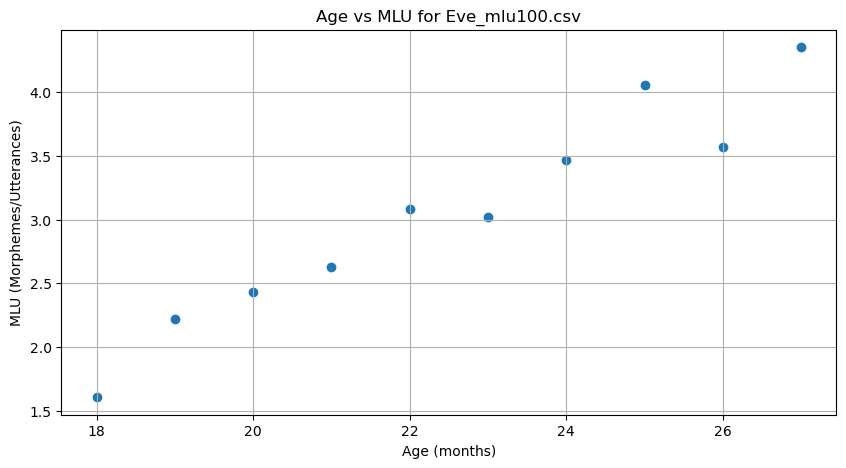

Spearman's rho for Eve_mlu100.csv: 0.9758

Chosen Transcripts for Eve_mlu100.csv: 
 ['010600a.ipcore-100.cex', '010700a.ipcore-100.cex', '010800.ipcore-100.cex', '010900a.ipcore-100.cex', '011000a.ipcore-100.cex', '011100a.ipcore-100.cex', '020000a.ipcore-100.cex', '020100a.ipcore-100.cex', '020200a.ipcore-100.cex', '020300a.ipcore-100.cex'] 

MLU Scores for Eve_mlu100.csv: 
 [1.607, 2.221, 2.436, 2.626, 3.085, 3.022, 3.468, 4.053, 3.571, 4.352] 

Ages for Eve_mlu100.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_mlu100.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



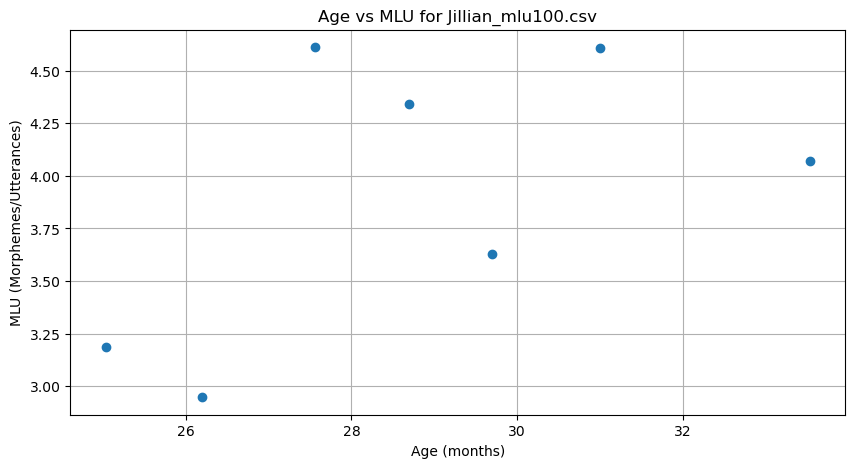

Spearman's rho for Jillian_mlu100.csv: 0.4286

Chosen Transcripts for Jillian_mlu100.csv: 
 ['020101.ipcore-100.cex', '020206.ipcore-100.cex', '020317.ipcore-100.cex', '020421.ipcore-100.cex', '020521.ipcore-100.cex', '020700.ipcore-100.cex', '020916.ipcore-100.cex'] 

MLU Scores for Jillian_mlu100.csv: 
 [3.188, 2.948, 4.611, 4.343, 3.629, 4.608, 4.071] 

Ages for Jillian_mlu100.csv: 
 [25.033333333333335, 26.2, 27.566666666666666, 28.7, 29.7, 31.0, 33.53333333333333] 

Time Steps for Jillian_mlu100.csv: 
 [1.1666666666666643, 1.3666666666666671, 1.1333333333333329, 1.0, 1.3000000000000007, 2.5333333333333314] 



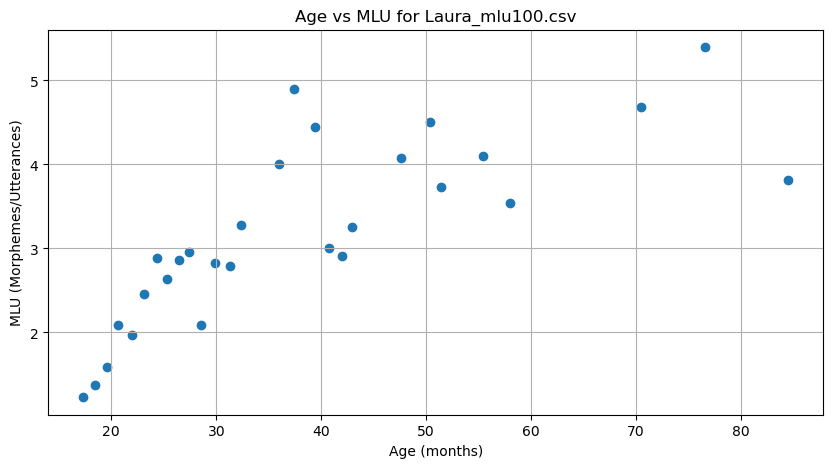

Spearman's rho for Laura_mlu100.csv: 0.8566

Chosen Transcripts for Laura_mlu100.csv: 
 ['010510.ipcore-100.cex', '010614a.ipcore-100.cex', '010717.ipcore-100.cex', '010819.ipcore-100.cex', '011000.ipcore-100.cex', '011103.ipcore-100.cex', '020010.ipcore-100.cex', '020110.ipcore-100.cex', '020212a.ipcore-100.cex', '020312.ipcore-100.cex', '020416.ipcore-100.cex', '020526.ipcore-100.cex', '020708.ipcore-100.cex', '020811.ipcore-100.cex', '030000.ipcore-100.cex', '030113.ipcore-100.cex', '030311.ipcore-100.cex', '030422.ipcore-100.cex', '030528a.ipcore-100.cex', '030628.ipcore-100.cex', '031117.ipcore-100.cex', '040211a.ipcore-100.cex', '040311a.ipcore-100.cex', '040711a.ipcore-100.cex', '041000.ipcore-100.cex', '051013.ipcore-100.cex', '060417.ipcore-100.cex', '070014.ipcore-100.cex'] 

MLU Scores for Laura_mlu100.csv: 
 [1.229, 1.379, 1.585, 2.094, 1.968, 2.457, 2.886, 2.636, 2.865, 2.955, 2.088, 2.831, 2.79, 3.284, 4.0, 4.903, 4.443, 3.0, 2.912, 3.25, 4.071, 4.5, 3.727, 4.096, 3.541, 

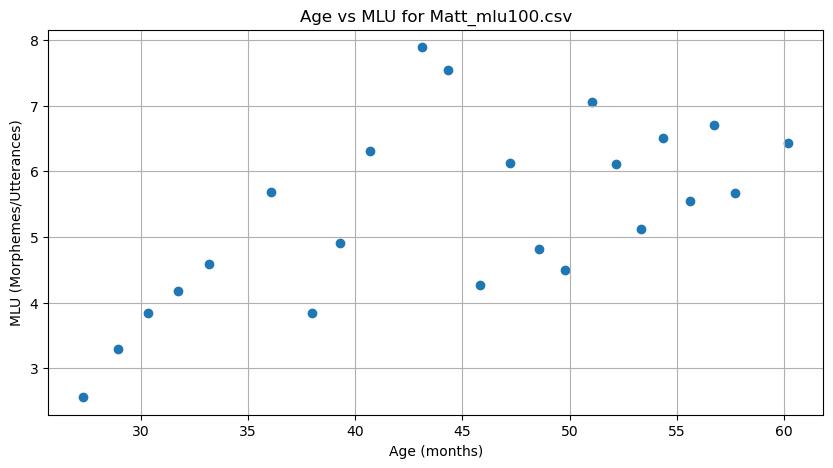

Spearman's rho for Matt_mlu100.csv: 0.5889

Chosen Transcripts for Matt_mlu100.csv: 
 ['020310.ipcore-100.cex', '020428.ipcore-100.cex', '020611.ipcore-100.cex', '020722.ipcore-100.cex', '020905.ipcore-100.cex', '030002.ipcore-100.cex', '030129.ipcore-100.cex', '030309.ipcore-100.cex', '030421.ipcore-100.cex', '030704.ipcore-100.cex', '030810.ipcore-100.cex', '030924.ipcore-100.cex', '031106.ipcore-100.cex', '040017.ipcore-100.cex', '040123.ipcore-100.cex', '040301.ipcore-100.cex', '040405.ipcore-100.cex', '040509.ipcore-100.cex', '040610.ipcore-100.cex', '040718.ipcore-100.cex', '040821.ipcore-100.cex', '040921.ipcore-100.cex', '050005.ipcore-100.cex'] 

MLU Scores for Matt_mlu100.csv: 
 [2.557, 3.298, 3.835, 4.181, 4.594, 5.682, 3.833, 4.909, 6.305, 7.889, 7.536, 4.263, 6.125, 4.82, 4.49, 7.061, 6.112, 5.117, 6.51, 5.551, 6.705, 5.667, 6.433] 

Ages for Matt_mlu100.csv: 
 [27.333333333333332, 28.933333333333334, 30.366666666666667, 31.733333333333334, 33.166666666666664, 36.066666666

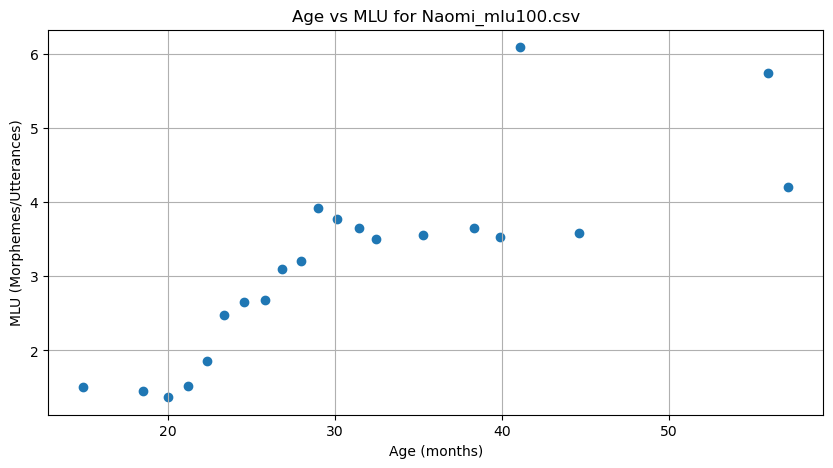

Spearman's rho for Naomi_mlu100.csv: 0.8948

Chosen Transcripts for Naomi_mlu100.csv: 
 ['010229.ipcore-100.cex', '010616.ipcore-100.cex', '010800.ipcore-100.cex', '010907.ipcore-100.cex', '011010a.ipcore-100.cex', '011111.ipcore-100.cex', '020018.ipcore-100.cex', '020125.ipcore-100.cex', '020225.ipcore-100.cex', '020329.ipcore-100.cex', '020430.ipcore-100.cex', '020604.ipcore-100.cex', '020713.ipcore-100.cex', '020814.ipcore-100.cex', '021108.ipcore-100.cex', '030210.ipcore-100.cex', '030326.ipcore-100.cex', '030503.ipcore-100.cex', '030819.ipcore-100.cex', '040728.ipcore-100.cex', '040903.ipcore-100.cex'] 

MLU Scores for Naomi_mlu100.csv: 
 [1.5, 1.447, 1.368, 1.524, 1.852, 2.481, 2.656, 2.682, 3.104, 3.214, 3.919, 3.769, 3.647, 3.51, 3.553, 3.656, 3.536, 6.094, 3.59, 5.75, 4.202] 

Ages for Naomi_mlu100.csv: 
 [14.966666666666667, 18.53333333333333, 20.0, 21.233333333333334, 22.333333333333336, 23.366666666666667, 24.6, 25.833333333333332, 26.833333333333332, 27.96666666666667, 29.

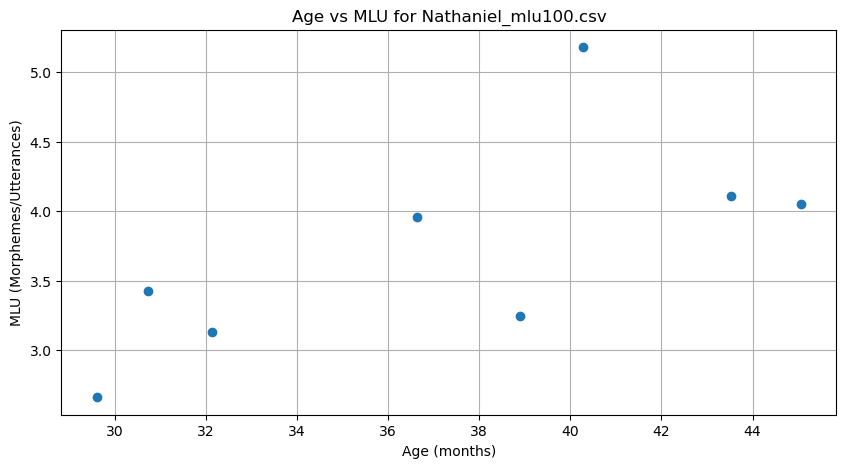

Spearman's rho for Nathaniel_mlu100.csv: 0.7857

Chosen Transcripts for Nathaniel_mlu100.csv: 
 ['020518a.ipcore-100.cex', '020622a.ipcore-100.cex', '020804a.ipcore-100.cex', '030019a.ipcore-100.cex', '030227a.ipcore-100.cex', '030408a.ipcore-100.cex', '030716.ipcore-100.cex', '030902.ipcore-100.cex'] 

MLU Scores for Nathaniel_mlu100.csv: 
 [2.663, 3.429, 3.133, 3.955, 3.25, 5.179, 4.111, 4.054] 

Ages for Nathaniel_mlu100.csv: 
 [29.6, 30.733333333333334, 32.13333333333333, 36.63333333333333, 38.9, 40.266666666666666, 43.53333333333333, 45.06666666666666] 

Time Steps for Nathaniel_mlu100.csv: 
 [1.1333333333333329, 1.3999999999999986, 4.5, 2.2666666666666657, 1.3666666666666671, 3.2666666666666657, 1.5333333333333314] 



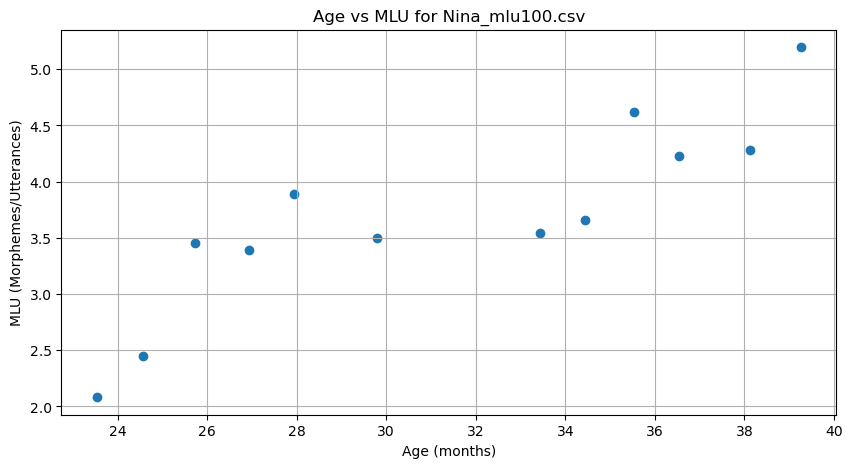

Spearman's rho for Nina_mlu100.csv: 0.9301

Chosen Transcripts for Nina_mlu100.csv: 
 ['011116.ipcore-100.cex', '020017.ipcore-100.cex', '020122.ipcore-100.cex', '020228.ipcore-100.cex', '020328.ipcore-100.cex', '020524.ipcore-100.cex', '020913.ipcore-100.cex', '021013.ipcore-100.cex', '021116.ipcore-100.cex', '030016.ipcore-100.cex', '030204.ipcore-100.cex', '030308.ipcore-100.cex'] 

MLU Scores for Nina_mlu100.csv: 
 [2.082, 2.446, 3.453, 3.388, 3.89, 3.495, 3.541, 3.657, 4.616, 4.232, 4.286, 5.196] 

Ages for Nina_mlu100.csv: 
 [23.53333333333333, 24.566666666666666, 25.733333333333334, 26.933333333333334, 27.933333333333334, 29.8, 33.43333333333334, 34.43333333333334, 35.53333333333333, 36.53333333333333, 38.13333333333333, 39.266666666666666] 

Time Steps for Nina_mlu100.csv: 
 [1.033333333333335, 1.1666666666666679, 1.1999999999999993, 1.0, 1.8666666666666671, 3.6333333333333364, 1.0, 1.0999999999999943, 1.0, 1.6000000000000014, 1.1333333333333329] 



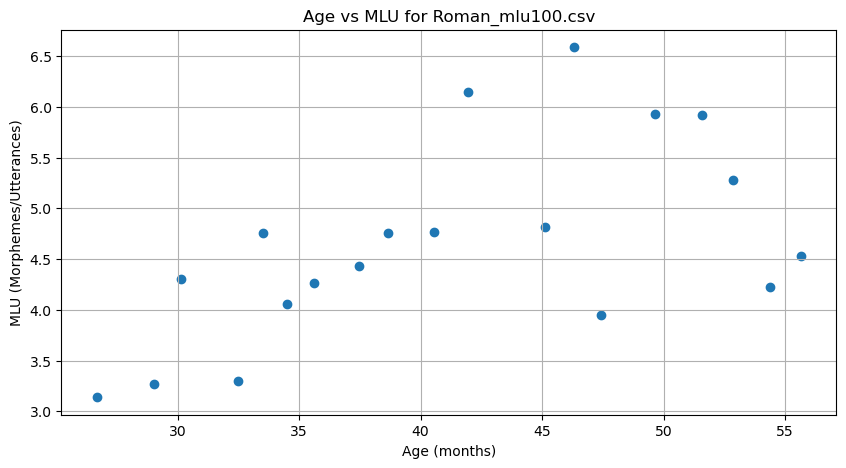

Spearman's rho for Roman_mlu100.csv: 0.5509

Chosen Transcripts for Roman_mlu100.csv: 
 ['020220.ipcore-100.cex', '020501.ipcore-100.cex', '020604.ipcore-100.cex', '020814.ipcore-100.cex', '020915.ipcore-100.cex', '021015.ipcore-100.cex', '021118.ipcore-100.cex', '030114.ipcore-100.cex', '030220.ipcore-100.cex', '030417.ipcore-100.cex', '030529.ipcore-100.cex', '030904.ipcore-100.cex', '031009.ipcore-100.cex', '031113.ipcore-100.cex', '040119.ipcore-100.cex', '040317.ipcore-100.cex', '040426.ipcore-100.cex', '040611.ipcore-100.cex', '040720.ipcore-100.cex'] 

MLU Scores for Roman_mlu100.csv: 
 [3.139, 3.27, 4.299, 3.299, 4.761, 4.057, 4.26, 4.427, 4.756, 4.763, 6.149, 4.813, 6.587, 3.948, 5.926, 5.917, 5.278, 4.222, 4.535] 

Ages for Roman_mlu100.csv: 
 [26.666666666666668, 29.03333333333333, 30.133333333333333, 32.46666666666667, 33.5, 34.5, 35.6, 37.46666666666667, 38.666666666666664, 40.56666666666666, 41.96666666666667, 45.13333333333333, 46.3, 47.43333333333334, 49.63333333333333,

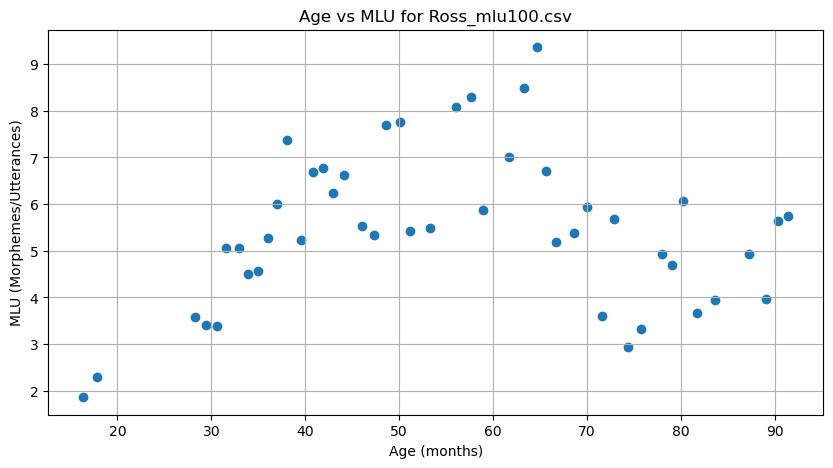

Spearman's rho for Ross_mlu100.csv: 0.0968

Chosen Transcripts for Ross_mlu100.csv: 
 ['010411a.ipcore-100.cex', '010523.ipcore-100.cex', '020409.ipcore-100.cex', '020514a.ipcore-100.cex', '020617a.ipcore-100.cex', '020718a.ipcore-100.cex', '020827a.ipcore-100.cex', '020928.ipcore-100.cex', '021100a.ipcore-100.cex', '030001a.ipcore-100.cex', '030101.ipcore-100.cex', '030202.ipcore-100.cex', '030315a.ipcore-100.cex', '030426a.ipcore-100.cex', '030526a.ipcore-100.cex', '030628.ipcore-100.cex', '030803a.ipcore-100.cex', '031001.ipcore-100.cex', '031109.ipcore-100.cex', '040019.ipcore-100.cex', '040201.ipcore-100.cex', '040305a.ipcore-100.cex', '040508a.ipcore-100.cex', '040800a.ipcore-100.cex', '040920a.ipcore-100.cex', '041027a.ipcore-100.cex', '050120a.ipcore-100.cex', '050309a.ipcore-100.cex', '050420a.ipcore-100.cex', '050520a.ipcore-100.cex', '050622a.ipcore-100.cex', '050820a.ipcore-100.cex', '051001a.ipcore-100.cex', '051117a.ipcore-100.cex', '060027b.ipcore-100.cex', '060211a1.ipc

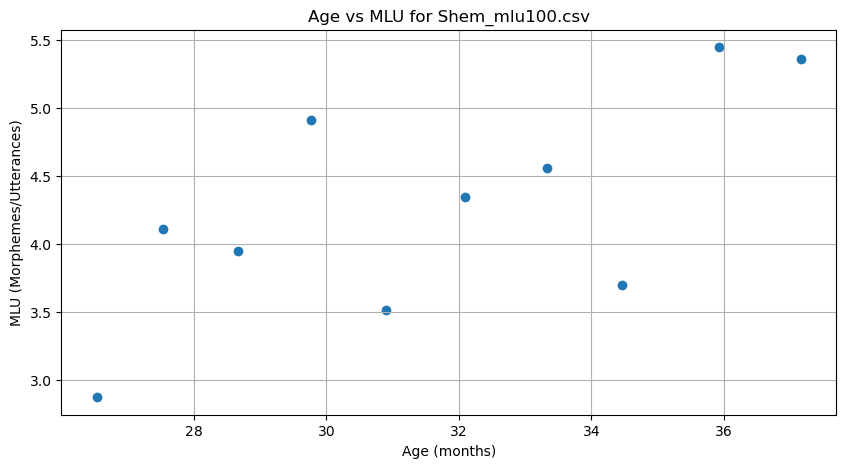

Spearman's rho for Shem_mlu100.csv: 0.6242

Chosen Transcripts for Shem_mlu100.csv: 
 ['020216.ipcore-100.cex', '020316.ipcore-100.cex', '020420.ipcore-100.cex', '020523.ipcore-100.cex', '020627.ipcore-100.cex', '020803.ipcore-100.cex', '020910.ipcore-100.cex', '021014.ipcore-100.cex', '021128.ipcore-100.cex', '030105.ipcore-100.cex'] 

MLU Scores for Shem_mlu100.csv: 
 [2.874, 4.113, 3.948, 4.91, 3.515, 4.35, 4.56, 3.701, 5.449, 5.364] 

Ages for Shem_mlu100.csv: 
 [26.53333333333333, 27.53333333333333, 28.666666666666668, 29.766666666666666, 30.9, 32.1, 33.333333333333336, 34.46666666666667, 35.93333333333334, 37.166666666666664] 

Time Steps for Shem_mlu100.csv: 
 [1.0, 1.1333333333333364, 1.0999999999999979, 1.1333333333333329, 1.2000000000000028, 1.2333333333333343, 1.1333333333333329, 1.4666666666666686, 1.2333333333333272] 



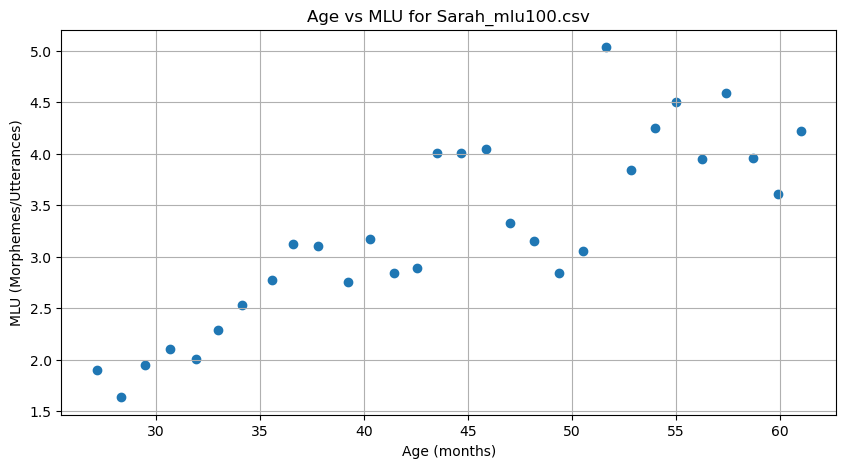

Spearman's rho for Sarah_mlu100.csv: 0.8394

Chosen Transcripts for Sarah_mlu100.csv: 
 ['020305.ipcore-100.cex', '020410.ipcore-100.cex', '020515.ipcore-100.cex', '020620.ipcore-100.cex', '020728.ipcore-100.cex', '020900.ipcore-100.cex', '021005.ipcore-100.cex', '021117.ipcore-100.cex', '030018a.ipcore-100.cex', '030124.ipcore-100.cex', '030307a.ipcore-100.cex', '030409.ipcore-100.cex', '030513.ipcore-100.cex', '030616.ipcore-100.cex', '030716.ipcore-100.cex', '030820.ipcore-100.cex', '030926a.ipcore-100.cex', '031030.ipcore-100.cex', '040005.ipcore-100.cex', '040111.ipcore-100.cex', '040216.ipcore-100.cex', '040319.ipcore-100.cex', '040425.ipcore-100.cex', '040529.ipcore-100.cex', '040700.ipcore-100.cex', '040807.ipcore-100.cex', '040912.ipcore-100.cex', '041021.ipcore-100.cex', '041126.ipcore-100.cex', '050030.ipcore-100.cex'] 

MLU Scores for Sarah_mlu100.csv: 
 [1.895, 1.635, 1.948, 2.106, 2.011, 2.293, 2.533, 2.776, 3.12, 3.105, 2.755, 3.177, 2.84, 2.889, 4.011, 4.012, 4.046, 3.3

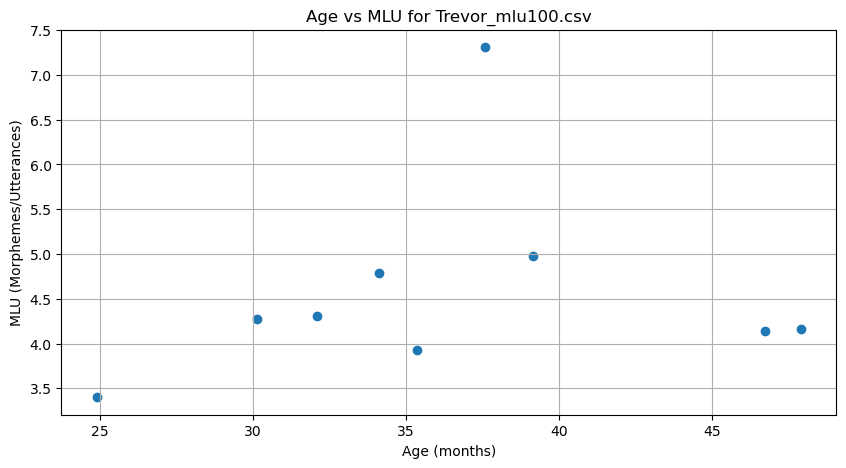

Spearman's rho for Trevor_mlu100.csv: 0.2000

Chosen Transcripts for Trevor_mlu100.csv: 
 ['020027.ipcore-100.cex', '020604.ipcore-100.cex', '020803.ipcore-100.cex', '021004.ipcore-100.cex', '021111.ipcore-100.cex', '030117.ipcore-100.cex', '030304.ipcore-100.cex', '031022.ipcore-100.cex', '031127a.ipcore-100.cex'] 

MLU Scores for Trevor_mlu100.csv: 
 [3.4, 4.27, 4.303, 4.79, 3.929, 7.31, 4.98, 4.141, 4.158] 

Ages for Trevor_mlu100.csv: 
 [24.9, 30.133333333333333, 32.1, 34.13333333333333, 35.36666666666667, 37.56666666666667, 39.13333333333333, 46.733333333333334, 47.9] 

Time Steps for Trevor_mlu100.csv: 
 [5.233333333333334, 1.9666666666666686, 2.0333333333333314, 1.2333333333333343, 2.200000000000003, 1.5666666666666629, 7.600000000000001, 1.1666666666666643] 



In [6]:
age_mlu_plots(mlu_files_100, spearman_rhos_100, age_files)

## Age vs MLU (All Utterances)

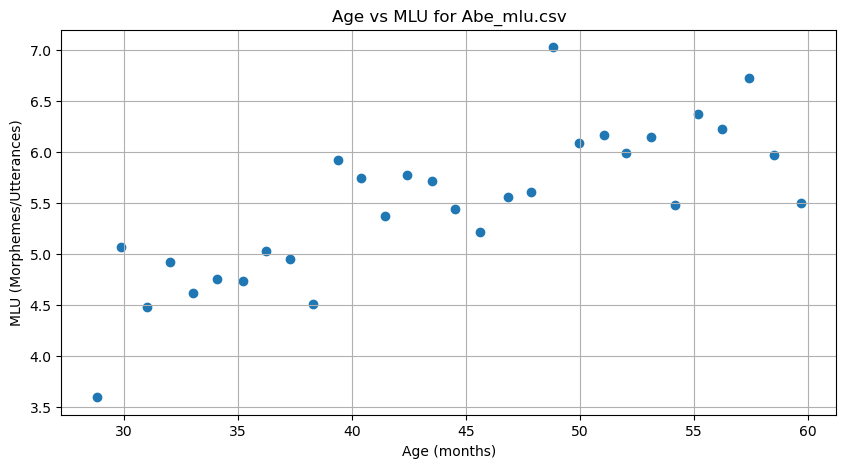

Spearman's rho for Abe_mlu.csv: 0.7989

Chosen Transcripts for Abe_mlu.csv: 
 ['020424.cha', '020526.cha', '020700.cha', '020801.cha', '020901.cha', '021003.cha', '021106.cha', '030007.cha', '030108.cha', '030209.cha', '030311.cha', '030412.cha', '030513.cha', '030613.cha', '030715.cha', '030816.cha', '030919.cha', '031025.cha', '031125.cha', '040025.cha', '040129.cha', '040301.cha', '040401.cha', '040503.cha', '040605.cha', '040705.cha', '040807.cha', '040912.cha', '041015.cha', '041121.cha'] 

MLU Scores for Abe_mlu.csv: 
 [3.596, 5.066, 4.483, 4.921, 4.614, 4.757, 4.736, 5.029, 4.953, 4.507, 5.923, 5.744, 5.373, 5.776, 5.717, 5.444, 5.212, 5.556, 5.602, 7.025, 6.088, 6.162, 5.99, 6.143, 5.479, 6.37, 6.222, 6.72, 5.967, 5.5] 

Ages for Abe_mlu.csv: 
 [28.8, 29.866666666666667, 31.0, 32.03333333333333, 33.03333333333333, 34.1, 35.2, 36.233333333333334, 37.266666666666666, 38.3, 39.36666666666667, 40.4, 41.43333333333334, 42.43333333333334, 43.5, 44.53333333333333, 45.63333333333333, 4

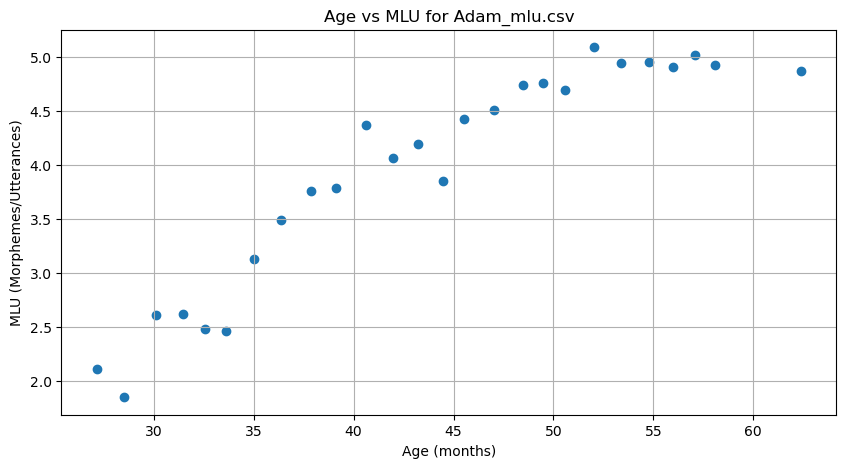

Spearman's rho for Adam_mlu.csv: 0.9528

Chosen Transcripts for Adam_mlu.csv: 
 ['020304.cha', '020415.cha', '020603.cha', '020714.cha', '020816.cha', '020918.cha', '021030.cha', '030011.cha', '030126.cha', '030304.cha', '030418.cha', '030529.cha', '030707.cha', '030814.cha', '030916.cha', '031101.cha', '040014.cha', '040115.cha', '040217.cha', '040401.cha', '040511.cha', '040624.cha', '040729.cha', '040902.cha', '041002.cha', '050212.cha'] 

MLU Scores for Adam_mlu.csv: 
 [2.11, 1.853, 2.615, 2.627, 2.481, 2.464, 3.13, 3.497, 3.761, 3.792, 4.368, 4.069, 4.2, 3.856, 4.429, 4.514, 4.74, 4.763, 4.692, 5.092, 4.949, 4.955, 4.907, 5.018, 4.926, 4.876] 

Ages for Adam_mlu.csv: 
 [27.133333333333333, 28.5, 30.1, 31.46666666666667, 32.53333333333333, 33.6, 35.0, 36.36666666666667, 37.86666666666667, 39.13333333333333, 40.6, 41.96666666666667, 43.233333333333334, 44.46666666666667, 45.53333333333333, 47.03333333333333, 48.46666666666667, 49.5, 50.56666666666666, 52.03333333333333, 53.366666666

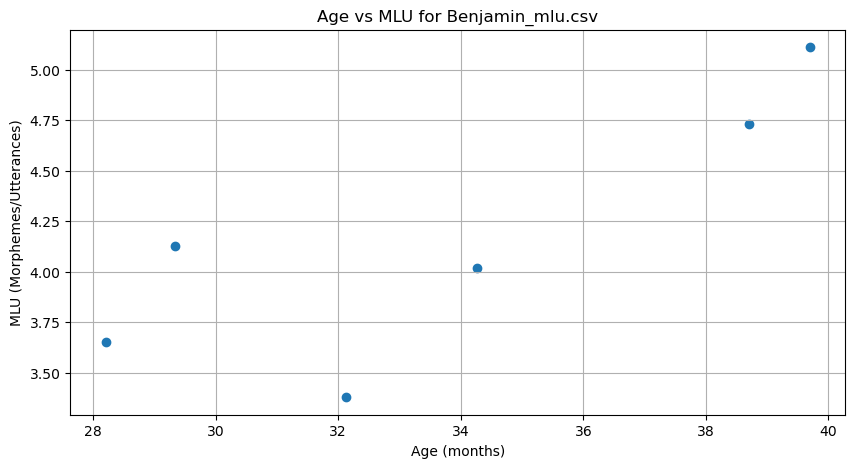

Spearman's rho for Benjamin_mlu.csv: 0.7143

Chosen Transcripts for Benjamin_mlu.csv: 
 ['020406.cha', '020510.cha', '020804.cha', '021008.cha', '030221.cha', '030321.cha'] 

MLU Scores for Benjamin_mlu.csv: 
 [3.65, 4.127, 3.379, 4.019, 4.731, 5.111] 

Ages for Benjamin_mlu.csv: 
 [28.2, 29.333333333333332, 32.13333333333333, 34.266666666666666, 38.7, 39.7] 

Time Steps for Benjamin_mlu.csv: 
 [1.1333333333333329, 2.8000000000000007, 2.133333333333333, 4.433333333333337, 1.0] 



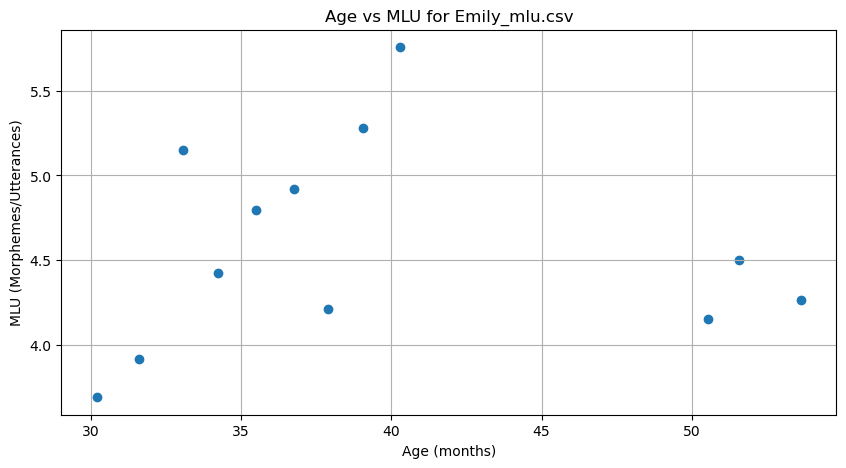

Spearman's rho for Emily_mlu.csv: 0.2587

Chosen Transcripts for Emily_mlu.csv: 
 ['020606.cha', '020718.cha', '020902.cha', '021007.cha', '021115.cha', '030023.cha', '030127.cha', '030302.cha', '030409.cha', '040216.cha', '040317.cha', '040519.cha'] 

MLU Scores for Emily_mlu.csv: 
 [3.689, 3.912, 5.148, 4.423, 4.798, 4.919, 4.212, 5.283, 5.758, 4.154, 4.5, 4.264] 

Ages for Emily_mlu.csv: 
 [30.2, 31.6, 33.06666666666666, 34.233333333333334, 35.5, 36.766666666666666, 37.9, 39.06666666666667, 40.3, 50.53333333333333, 51.56666666666666, 53.63333333333333] 

Time Steps for Emily_mlu.csv: 
 [1.4000000000000021, 1.4666666666666615, 1.1666666666666714, 1.2666666666666657, 1.2666666666666657, 1.1333333333333329, 1.1666666666666714, 1.2333333333333272, 10.233333333333334, 1.0333333333333314, 2.06666666666667] 



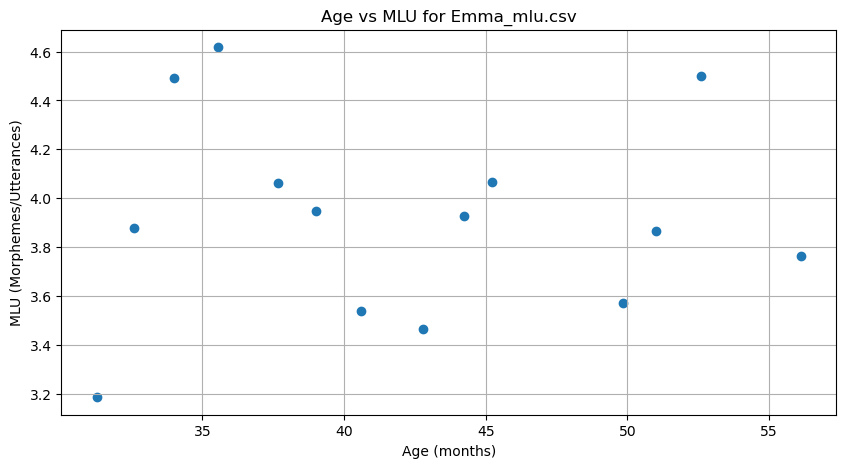

Spearman's rho for Emma_mlu.csv: -0.0110

Chosen Transcripts for Emma_mlu.csv: 
 ['020708.cha', '020818.cha', '021000.cha', '021116.cha', '030120.cha', '030300.cha', '030418.cha', '030624.cha', '030807.cha', '030907.cha', '040125.cha', '040300.cha', '040418.cha', '040804.cha'] 

MLU Scores for Emma_mlu.csv: 
 [3.185, 3.878, 4.49, 4.618, 4.064, 3.947, 3.538, 3.464, 3.929, 4.067, 3.571, 3.867, 4.501, 3.762] 

Ages for Emma_mlu.csv: 
 [31.266666666666666, 32.6, 34.0, 35.53333333333333, 37.666666666666664, 39.0, 40.6, 42.8, 44.233333333333334, 45.233333333333334, 49.833333333333336, 51.0, 52.6, 56.13333333333333] 

Time Steps for Emma_mlu.csv: 
 [1.3333333333333357, 1.3999999999999986, 1.5333333333333314, 2.133333333333333, 1.3333333333333357, 1.6000000000000014, 2.1999999999999957, 1.4333333333333371, 1.0, 4.600000000000001, 1.1666666666666643, 1.6000000000000014, 3.5333333333333314] 



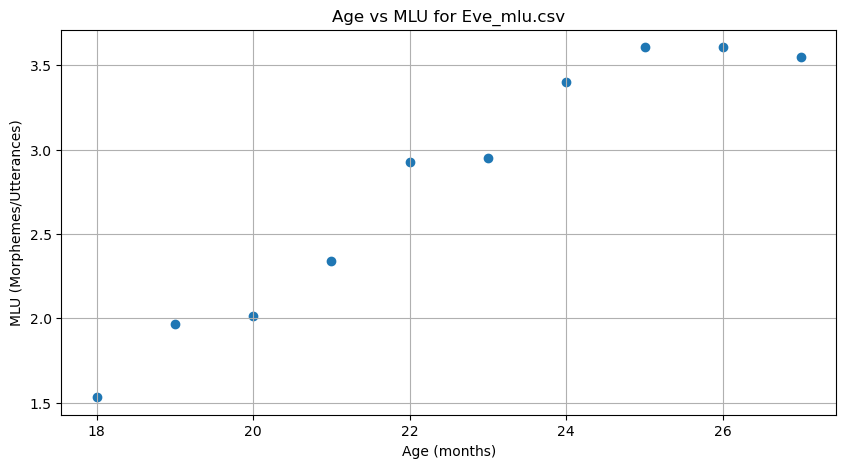

Spearman's rho for Eve_mlu.csv: 0.9636

Chosen Transcripts for Eve_mlu.csv: 
 ['010600a.cha', '010700a.cha', '010800.cha', '010900a.cha', '011000a.cha', '011100a.cha', '020000a.cha', '020100a.cha', '020200a.cha', '020300a.cha'] 

MLU Scores for Eve_mlu.csv: 
 [1.533, 1.964, 2.016, 2.337, 2.925, 2.95, 3.401, 3.605, 3.606, 3.549] 

Ages for Eve_mlu.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_mlu.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



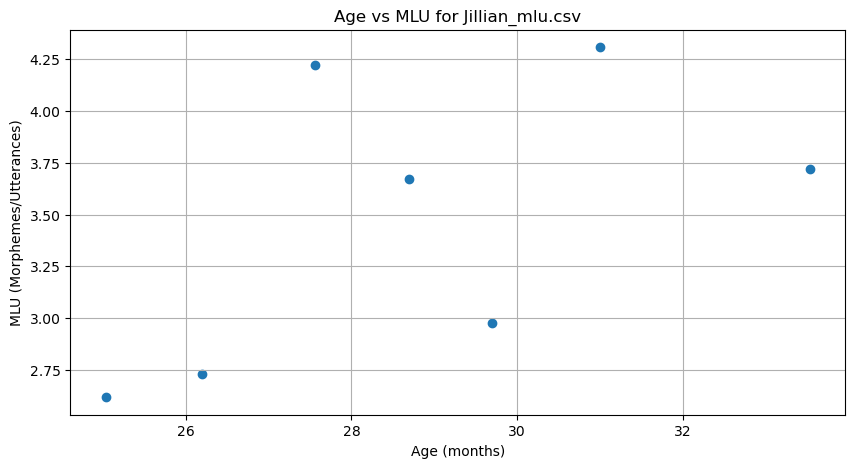

Spearman's rho for Jillian_mlu.csv: 0.6786

Chosen Transcripts for Jillian_mlu.csv: 
 ['020101.cha', '020206.cha', '020317.cha', '020421.cha', '020521.cha', '020700.cha', '020916.cha'] 

MLU Scores for Jillian_mlu.csv: 
 [2.618, 2.73, 4.22, 3.673, 2.974, 4.308, 3.72] 

Ages for Jillian_mlu.csv: 
 [25.033333333333335, 26.2, 27.566666666666666, 28.7, 29.7, 31.0, 33.53333333333333] 

Time Steps for Jillian_mlu.csv: 
 [1.1666666666666643, 1.3666666666666671, 1.1333333333333329, 1.0, 1.3000000000000007, 2.5333333333333314] 



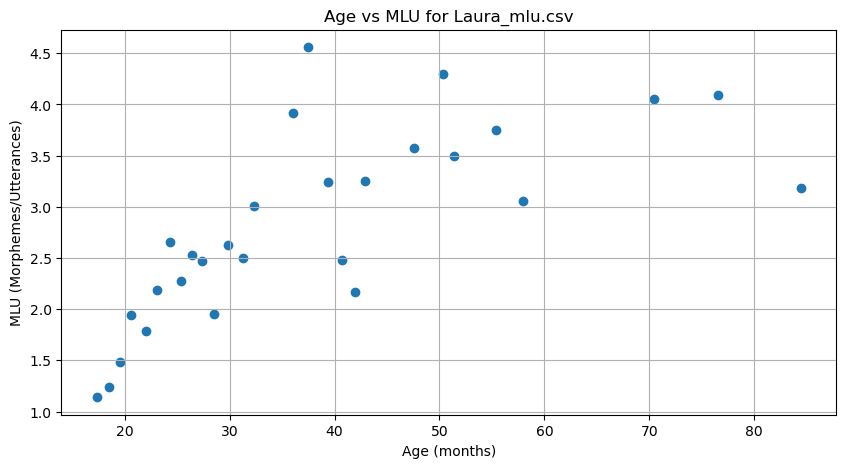

Spearman's rho for Laura_mlu.csv: 0.7975

Chosen Transcripts for Laura_mlu.csv: 
 ['010510.cha', '010614a.cha', '010717.cha', '010819.cha', '011000.cha', '011103.cha', '020010.cha', '020110.cha', '020212a.cha', '020312.cha', '020416.cha', '020526.cha', '020708.cha', '020811.cha', '030000.cha', '030113.cha', '030311.cha', '030422.cha', '030528a.cha', '030628.cha', '031117.cha', '040211a.cha', '040311a.cha', '040711a.cha', '041000.cha', '051013.cha', '060417.cha', '070014.cha'] 

MLU Scores for Laura_mlu.csv: 
 [1.14, 1.237, 1.486, 1.943, 1.791, 2.189, 2.659, 2.273, 2.531, 2.475, 1.95, 2.625, 2.5, 3.008, 3.917, 4.559, 3.246, 2.483, 2.171, 3.25, 3.575, 4.3, 3.5, 3.754, 3.06, 4.054, 4.091, 3.182] 

Ages for Laura_mlu.csv: 
 [17.333333333333332, 18.46666666666667, 19.566666666666666, 20.633333333333333, 22.0, 23.1, 24.333333333333332, 25.333333333333332, 26.4, 27.4, 28.53333333333333, 29.866666666666667, 31.266666666666666, 32.36666666666667, 36.0, 37.43333333333333, 39.36666666666667, 40.7

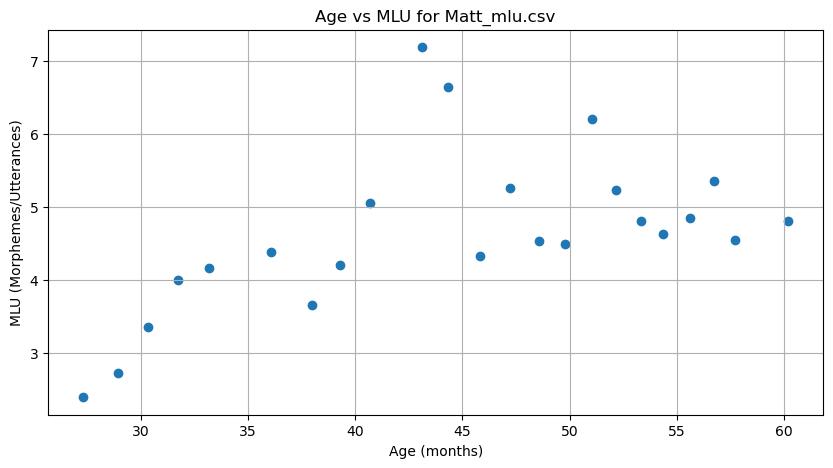

Spearman's rho for Matt_mlu.csv: 0.6443

Chosen Transcripts for Matt_mlu.csv: 
 ['020310.cha', '020428.cha', '020611.cha', '020722.cha', '020905.cha', '030002.cha', '030129.cha', '030309.cha', '030421.cha', '030704.cha', '030810.cha', '030924.cha', '031106.cha', '040017.cha', '040123.cha', '040301.cha', '040405.cha', '040509.cha', '040610.cha', '040718.cha', '040821.cha', '040921.cha', '050005.cha'] 

MLU Scores for Matt_mlu.csv: 
 [2.388, 2.717, 3.356, 3.99, 4.156, 4.381, 3.655, 4.201, 5.047, 7.188, 6.64, 4.328, 5.264, 4.534, 4.491, 6.199, 5.229, 4.807, 4.627, 4.842, 5.348, 4.549, 4.809] 

Ages for Matt_mlu.csv: 
 [27.333333333333332, 28.933333333333334, 30.366666666666667, 31.733333333333334, 33.166666666666664, 36.06666666666667, 37.96666666666667, 39.3, 40.7, 43.13333333333333, 44.333333333333336, 45.8, 47.2, 48.56666666666667, 49.766666666666666, 51.03333333333333, 52.166666666666664, 53.3, 54.333333333333336, 55.6, 56.7, 57.7, 60.166666666666664] 

Time Steps for Matt_mlu.csv: 
 

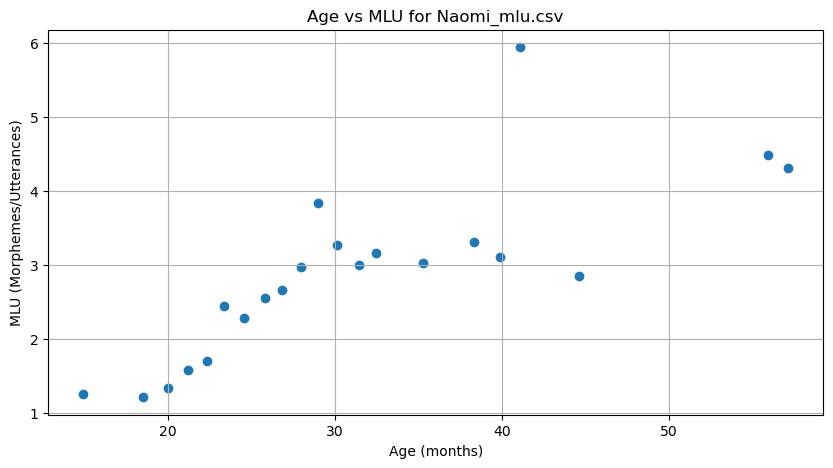

Spearman's rho for Naomi_mlu.csv: 0.8831

Chosen Transcripts for Naomi_mlu.csv: 
 ['010229.cha', '010616.cha', '010800.cha', '010907.cha', '011010a.cha', '011111.cha', '020018.cha', '020125.cha', '020225.cha', '020329.cha', '020430.cha', '020604.cha', '020713.cha', '020814.cha', '021108.cha', '030210.cha', '030326.cha', '030503.cha', '030819.cha', '040728.cha', '040903.cha'] 

MLU Scores for Naomi_mlu.csv: 
 [1.261, 1.218, 1.342, 1.588, 1.712, 2.447, 2.295, 2.556, 2.667, 2.977, 3.842, 3.278, 3.0, 3.162, 3.026, 3.309, 3.111, 5.948, 2.85, 4.486, 4.319] 

Ages for Naomi_mlu.csv: 
 [14.966666666666667, 18.53333333333333, 20.0, 21.233333333333334, 22.333333333333336, 23.366666666666667, 24.6, 25.833333333333332, 26.833333333333332, 27.96666666666667, 29.0, 30.133333333333333, 31.433333333333334, 32.46666666666667, 35.266666666666666, 38.333333333333336, 39.86666666666667, 41.1, 44.63333333333333, 55.93333333333334, 57.1] 

Time Steps for Naomi_mlu.csv: 
 [3.5666666666666647, 1.4666666666666

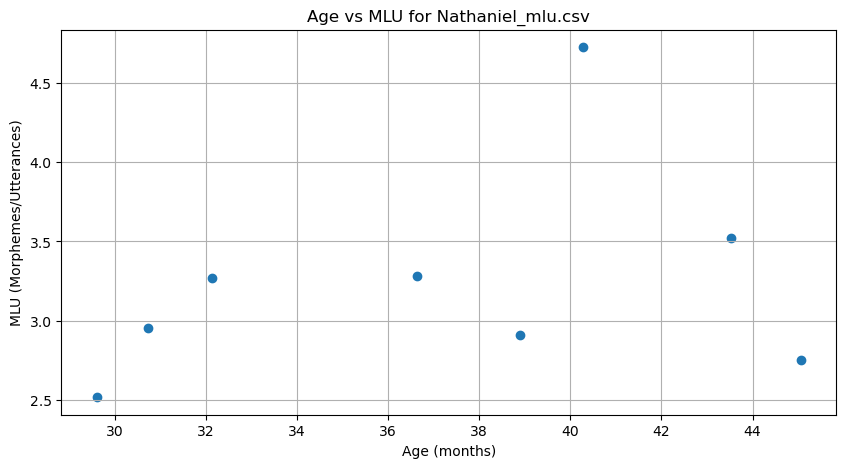

Spearman's rho for Nathaniel_mlu.csv: 0.3333

Chosen Transcripts for Nathaniel_mlu.csv: 
 ['020518a.cha', '020622a.cha', '020804a.cha', '030019a.cha', '030227a.cha', '030408a.cha', '030716.cha', '030902.cha'] 

MLU Scores for Nathaniel_mlu.csv: 
 [2.516, 2.952, 3.271, 3.283, 2.912, 4.727, 3.522, 2.75] 

Ages for Nathaniel_mlu.csv: 
 [29.6, 30.733333333333334, 32.13333333333333, 36.63333333333333, 38.9, 40.266666666666666, 43.53333333333333, 45.06666666666666] 

Time Steps for Nathaniel_mlu.csv: 
 [1.1333333333333329, 1.3999999999999986, 4.5, 2.2666666666666657, 1.3666666666666671, 3.2666666666666657, 1.5333333333333314] 



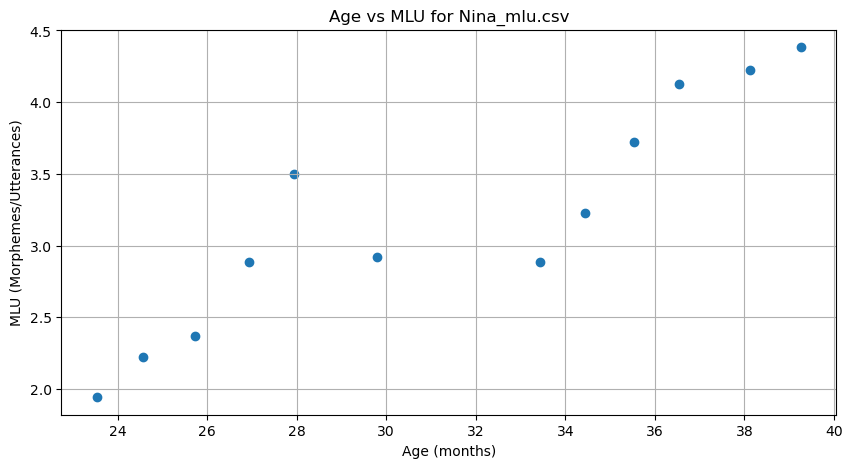

Spearman's rho for Nina_mlu.csv: 0.9422

Chosen Transcripts for Nina_mlu.csv: 
 ['011116.cha', '020017.cha', '020122.cha', '020228.cha', '020328.cha', '020524.cha', '020913.cha', '021013.cha', '021116.cha', '030016.cha', '030204.cha', '030308.cha'] 

MLU Scores for Nina_mlu.csv: 
 [1.943, 2.222, 2.372, 2.885, 3.5, 2.92, 2.885, 3.227, 3.722, 4.126, 4.221, 4.383] 

Ages for Nina_mlu.csv: 
 [23.53333333333333, 24.566666666666666, 25.733333333333334, 26.933333333333334, 27.933333333333334, 29.8, 33.43333333333334, 34.43333333333334, 35.53333333333333, 36.53333333333333, 38.13333333333333, 39.266666666666666] 

Time Steps for Nina_mlu.csv: 
 [1.033333333333335, 1.1666666666666679, 1.1999999999999993, 1.0, 1.8666666666666671, 3.6333333333333364, 1.0, 1.0999999999999943, 1.0, 1.6000000000000014, 1.1333333333333329] 



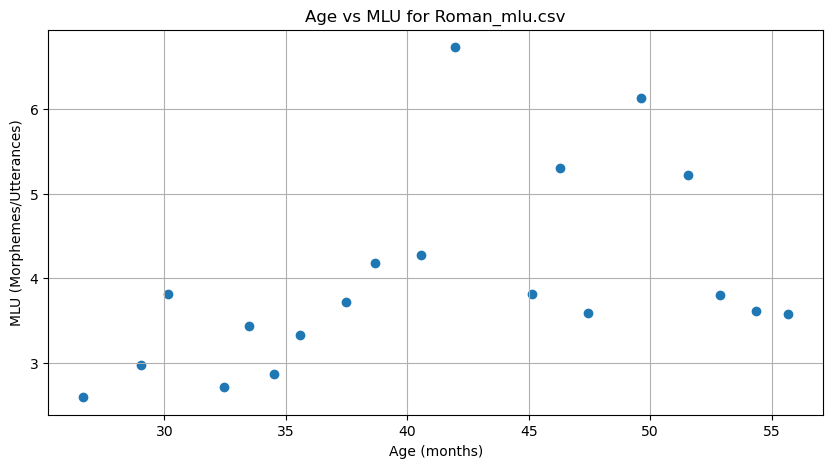

Spearman's rho for Roman_mlu.csv: 0.5070

Chosen Transcripts for Roman_mlu.csv: 
 ['020220.cha', '020501.cha', '020604.cha', '020814.cha', '020915.cha', '021015.cha', '021118.cha', '030114.cha', '030220.cha', '030417.cha', '030529.cha', '030904.cha', '031009.cha', '031113.cha', '040119.cha', '040317.cha', '040426.cha', '040611.cha', '040720.cha'] 

MLU Scores for Roman_mlu.csv: 
 [2.591, 2.978, 3.81, 2.716, 3.439, 2.868, 3.323, 3.724, 4.18, 4.279, 6.736, 3.809, 5.308, 3.583, 6.137, 5.225, 3.807, 3.617, 3.575] 

Ages for Roman_mlu.csv: 
 [26.666666666666668, 29.03333333333333, 30.133333333333333, 32.46666666666667, 33.5, 34.5, 35.6, 37.46666666666667, 38.666666666666664, 40.56666666666666, 41.96666666666667, 45.13333333333333, 46.3, 47.43333333333334, 49.63333333333333, 51.56666666666666, 52.86666666666667, 54.36666666666667, 55.666666666666664] 

Time Steps for Roman_mlu.csv: 
 [2.3666666666666636, 1.1000000000000014, 2.3333333333333357, 1.0333333333333314, 1.0, 1.1000000000000014, 1.8

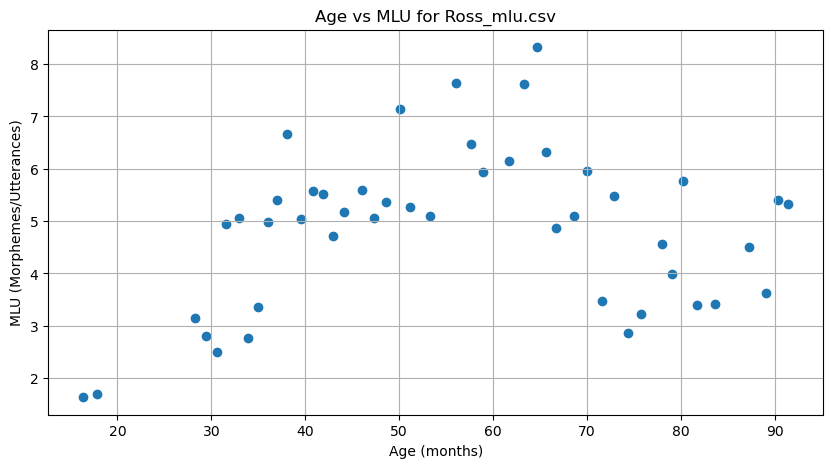

Spearman's rho for Ross_mlu.csv: 0.1954

Chosen Transcripts for Ross_mlu.csv: 
 ['010411a.cha', '010523.cha', '020409.cha', '020514a.cha', '020617a.cha', '020718a.cha', '020827a.cha', '020928.cha', '021100a.cha', '030001a.cha', '030101.cha', '030202.cha', '030315a.cha', '030426a.cha', '030526a.cha', '030628.cha', '030803a.cha', '031001.cha', '031109.cha', '040019.cha', '040201.cha', '040305a.cha', '040508a.cha', '040800a.cha', '040920a.cha', '041027a.cha', '050120a.cha', '050309a.cha', '050420a.cha', '050520a.cha', '050622a.cha', '050820a.cha', '051001a.cha', '051117a.cha', '060027b.cha', '060211a1.cha', '060323a.cha', '060530a.cha', '060701a.cha', '060807a.cha', '060922a.cha', '061119a.cha', '070309a.cha', '070503a.cha', '070600b.cha', '070712.cha'] 

MLU Scores for Ross_mlu.csv: 
 [1.636, 1.692, 3.142, 2.798, 2.508, 4.95, 5.067, 2.772, 3.351, 4.975, 5.405, 6.656, 5.05, 5.577, 5.524, 4.723, 5.175, 5.591, 5.065, 5.369, 7.144, 5.268, 5.09, 7.633, 6.483, 5.939, 6.151, 7.614, 8.323, 6.321

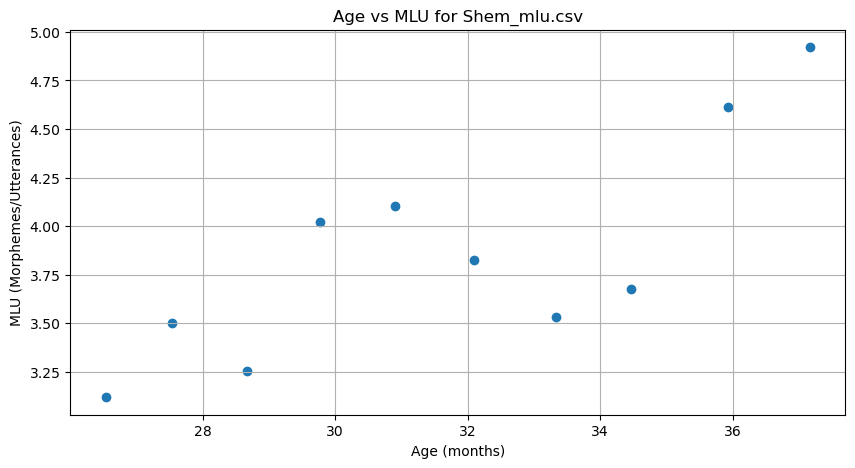

Spearman's rho for Shem_mlu.csv: 0.7697

Chosen Transcripts for Shem_mlu.csv: 
 ['020216.cha', '020316.cha', '020420.cha', '020523.cha', '020627.cha', '020803.cha', '020910.cha', '021014.cha', '021128.cha', '030105.cha'] 

MLU Scores for Shem_mlu.csv: 
 [3.119, 3.502, 3.253, 4.02, 4.104, 3.824, 3.533, 3.677, 4.614, 4.921] 

Ages for Shem_mlu.csv: 
 [26.53333333333333, 27.53333333333333, 28.666666666666668, 29.766666666666666, 30.9, 32.1, 33.333333333333336, 34.46666666666667, 35.93333333333334, 37.166666666666664] 

Time Steps for Shem_mlu.csv: 
 [1.0, 1.1333333333333364, 1.0999999999999979, 1.1333333333333329, 1.2000000000000028, 1.2333333333333343, 1.1333333333333329, 1.4666666666666686, 1.2333333333333272] 



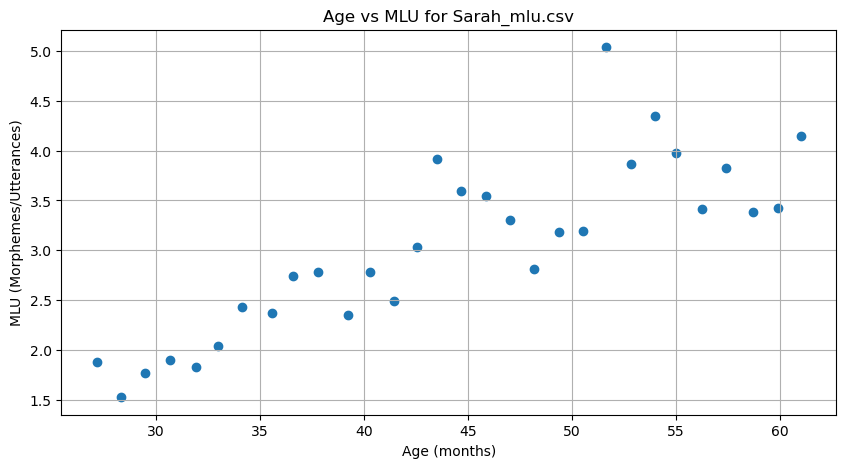

Spearman's rho for Sarah_mlu.csv: 0.8661

Chosen Transcripts for Sarah_mlu.csv: 
 ['020305.cha', '020410.cha', '020515.cha', '020620.cha', '020728.cha', '020900.cha', '021005.cha', '021117.cha', '030018a.cha', '030124.cha', '030307a.cha', '030409.cha', '030513.cha', '030616.cha', '030716.cha', '030820.cha', '030926a.cha', '031030.cha', '040005.cha', '040111.cha', '040216.cha', '040319.cha', '040425.cha', '040529.cha', '040700.cha', '040807.cha', '040912.cha', '041021.cha', '041126.cha', '050030.cha'] 

MLU Scores for Sarah_mlu.csv: 
 [1.882, 1.527, 1.769, 1.905, 1.834, 2.045, 2.427, 2.369, 2.74, 2.786, 2.353, 2.779, 2.491, 3.033, 3.913, 3.598, 3.548, 3.302, 2.816, 3.184, 3.197, 5.036, 3.862, 4.348, 3.979, 3.416, 3.822, 3.386, 3.42, 4.142] 

Ages for Sarah_mlu.csv: 
 [27.166666666666668, 28.333333333333332, 29.5, 30.666666666666668, 31.933333333333334, 33.0, 34.166666666666664, 35.56666666666666, 36.6, 37.8, 39.233333333333334, 40.3, 41.43333333333334, 42.53333333333333, 43.533333333333

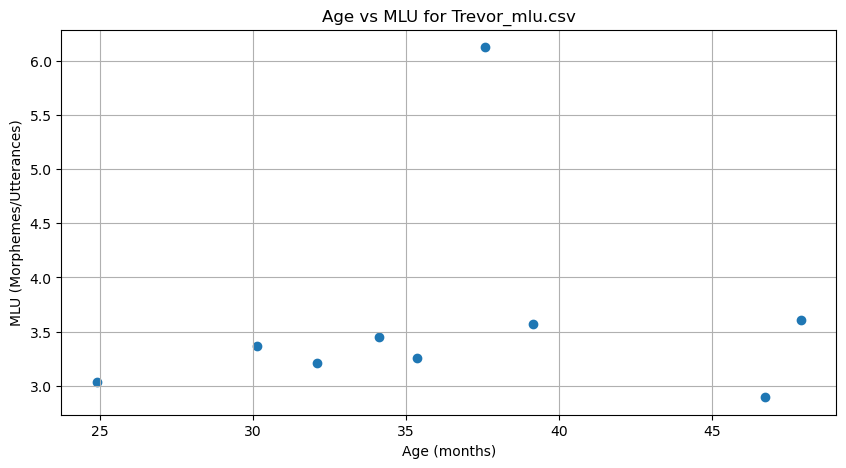

Spearman's rho for Trevor_mlu.csv: 0.3833

Chosen Transcripts for Trevor_mlu.csv: 
 ['020027.cha', '020604.cha', '020803.cha', '021004.cha', '021111.cha', '030117.cha', '030304.cha', '031022.cha', '031127a.cha'] 

MLU Scores for Trevor_mlu.csv: 
 [3.036, 3.368, 3.206, 3.447, 3.257, 6.126, 3.569, 2.894, 3.603] 

Ages for Trevor_mlu.csv: 
 [24.9, 30.133333333333333, 32.1, 34.13333333333333, 35.36666666666667, 37.56666666666667, 39.13333333333333, 46.733333333333334, 47.9] 

Time Steps for Trevor_mlu.csv: 
 [5.233333333333334, 1.9666666666666686, 2.0333333333333314, 1.2333333333333343, 2.200000000000003, 1.5666666666666629, 7.600000000000001, 1.1666666666666643] 



In [7]:
age_mlu_plots(mlu_files_all, spearman_rhos_all, age_files)

## Spearman's ρ

In [8]:
spearman_rhos_50

[['Abe_mlu50.csv', 0.6225642270636518],
 ['Adam_mlu50.csv', 0.8734610633928355],
 ['Benjamin_mlu50.csv', 0.3142857142857143],
 ['Emily_mlu50.csv', 0.3846153846153847],
 ['Emma_mlu50.csv', 0.1824175824175824],
 ['Eve_mlu50.csv', 0.9393939393939393],
 ['Jillian_mlu50.csv', 0.8571428571428573],
 ['Laura_mlu50.csv', 0.843300952197209],
 ['Matt_mlu50.csv', 0.6017786561264823],
 ['Naomi_mlu50.csv', 0.890909090909091],
 ['Nathaniel_mlu50.csv', 0.7619047619047621],
 ['Nina_mlu50.csv', 0.8251748251748254],
 ['Roman_mlu50.csv', 0.5],
 ['Ross_mlu50.csv', 0.10824646970659632],
 ['Shem_mlu50.csv', 0.5515151515151515],
 ['Sarah_mlu50.csv', 0.8784069472533214],
 ['Trevor_mlu50.csv', 0.33333333333333337]]

In [9]:
spearman_rhos_100

[['Abe_mlu100.csv', 0.7512791991101224],
 ['Adam_mlu100.csv', 0.8748717948717948],
 ['Benjamin_mlu100.csv', 0.48571428571428577],
 ['Emily_mlu100.csv', 0.3426573426573427],
 ['Emma_mlu100.csv', 0.006593406593406593],
 ['Eve_mlu100.csv', 0.9757575757575757],
 ['Jillian_mlu100.csv', 0.42857142857142866],
 ['Laura_mlu100.csv', 0.8565955117679256],
 ['Matt_mlu100.csv', 0.5889328063241107],
 ['Naomi_mlu100.csv', 0.8948051948051948],
 ['Nathaniel_mlu100.csv', 0.7857142857142858],
 ['Nina_mlu100.csv', 0.9300699300699302],
 ['Roman_mlu100.csv', 0.5508771929824561],
 ['Ross_mlu100.csv', 0.09676225716928769],
 ['Shem_mlu100.csv', 0.6242424242424242],
 ['Sarah_mlu100.csv', 0.839377085650723],
 ['Trevor_mlu100.csv', 0.19999999999999998]]

In [10]:
spearman_rhos_all

[['Abe_mlu.csv', 0.7988876529477197],
 ['Adam_mlu.csv', 0.9528205128205127],
 ['Benjamin_mlu.csv', 0.7142857142857143],
 ['Emily_mlu.csv', 0.25874125874125875],
 ['Emma_mlu.csv', -0.01098901098901099],
 ['Eve_mlu.csv', 0.9636363636363635],
 ['Jillian_mlu.csv', 0.6785714285714287],
 ['Laura_mlu.csv', 0.7974822112753147],
 ['Matt_mlu.csv', 0.6442687747035574],
 ['Naomi_mlu.csv', 0.8831168831168831],
 ['Nathaniel_mlu.csv', 0.3333333333333334],
 ['Nina_mlu.csv', 0.9422080999150758],
 ['Roman_mlu.csv', 0.5070175438596491],
 ['Ross_mlu.csv', 0.19543632439099598],
 ['Shem_mlu.csv', 0.7696969696969697],
 ['Sarah_mlu.csv', 0.8660734149054505],
 ['Trevor_mlu.csv', 0.38333333333333336]]